<a href="https://colab.research.google.com/github/marianopoisson/plot-tilt-stats/blob/colab/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble

In [1]:
!git clone https://github.com/marianopoisson/plot-tilt-stats.git /content/plot-tilt-stats
%cd /content/plot-tilt-stats
!pip install -e .

Cloning into '/content/plot-tilt-stats'...
remote: Enumerating objects: 203, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 203 (delta 8), reused 2 (delta 0), pack-reused 182 (from 1)
Receiving objects: 100% (203/203), 40.68 MiB | 12.42 MiB/s, done.
Resolving deltas: 100% (95/95), done.
/content/plot-tilt-stats
Obtaining file:///content/plot-tilt-stats
ERROR: file:///content/plot-tilt-stats does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install diptest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.7/222.7 kB 2.8 MB/s eta 0:00:00


In [4]:
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
from src import main, plotting, analysis, io_utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.transforms as mtransforms
from scipy import stats

In [5]:
%cd /content/plot-tilt-stats/notebooks/
df = main.main()

/content/plot-tilt-stats/notebooks


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/content/plot-tilt-stats/src/io_utils.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 9.92915533 15.04399737 18.9722507  ... 34.334142   34.95878496
 35.07788068]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['da']>= df['cond1'], 'gamma'] = 180*np.arccos((df.R+df.a)*(1-df.da)/df.R)/np.pi


7982
8040
8052
8056
8088
8122
8130
8171
8226
8404
8552
8589
8628
8649
8699
8851
8968
9063
9139
9308
9368
9396
9417
9574
9660
9678
9710
9884
10130
10137
10311
10391
10971
10987
11007
total ARs = 108


In [6]:
DFx2=df.assign(frac=lambda x: x.alpha-x.alphab)
DFx2=DFx2.assign(t_mean=lambda x: round(10*x.t_norm)/10)

In [7]:
DFx2.keys()

Index(['mag', 'da', 'alpha', 'a', 'R', 'N0', 'axf', 'xc', 'yc', 'alphab',
       'sar', 'lead', 'flux', 'fluxp', 'fluxn', 'fint', 'lat', 'AR', 'spt',
       'rot', 'rotb', 'cond1', 'gamma', 'sepax', 'stp', 'rot_cum', 'rotb_cum',
       't_norm', 'frac', 't_mean'],
      dtype='object')

# Few Plots

In [ ]:
db=DFx2.groupby(['AR','t_mean']).mean().reset_index()
#

In [ ]:
db1=db[db.t_mean==1]
db1['sin_lat']=db1['lat'].apply(lambda x: np.sin(np.radians(np.abs(x))))

/tmp/ipython-input-965072459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1['sin_lat']=db1['lat'].apply(lambda x: np.sin(np.radians(np.abs(x))))


<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-331555565.py:13: SyntaxWarning: invalid escape sequence '\m'
  ax.set_title(f'$t_\mathrm{{norm}} =${tt}')
/tmp/ipython-input-331555565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1['sin_lat']=db1['lat'].apply(lambda x: np.sin(np.radians(np.abs(x))))


RSME alpha: 16.28 deg; rho: 0.113768
RSME alphab: 24.03 deg; rho: 0.134998
RSME alpha: 14.05 deg; rho: 0.162635
RSME alphab: 15.16 deg; rho: 0.196348
RSME alpha: 12.77 deg; rho: 0.275487
RSME alphab: 13.14 deg; rho: 0.298030


/tmp/ipython-input-331555565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1['sin_lat']=db1['lat'].apply(lambda x: np.sin(np.radians(np.abs(x))))
/tmp/ipython-input-331555565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1['sin_lat']=db1['lat'].apply(lambda x: np.sin(np.radians(np.abs(x))))


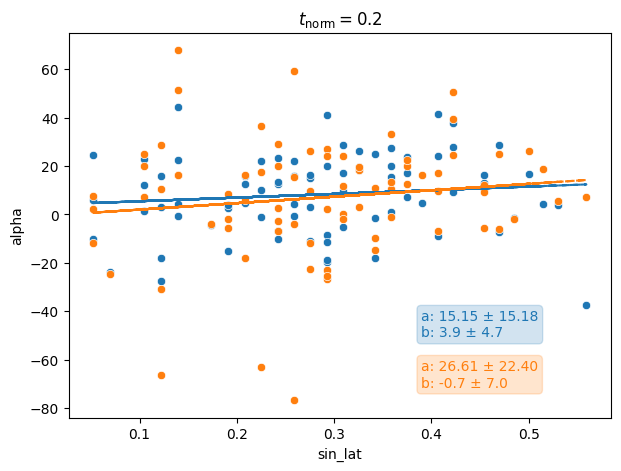

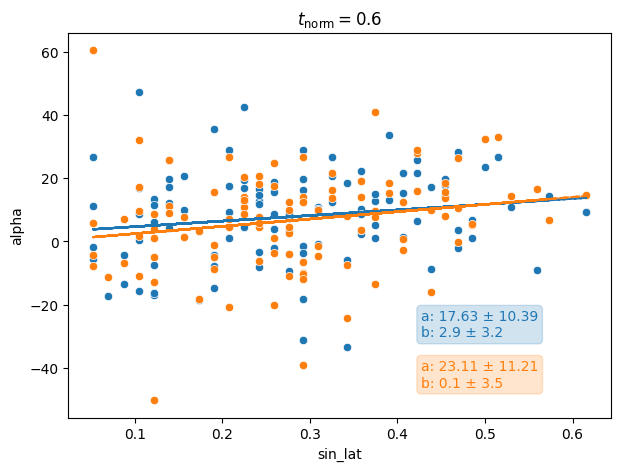

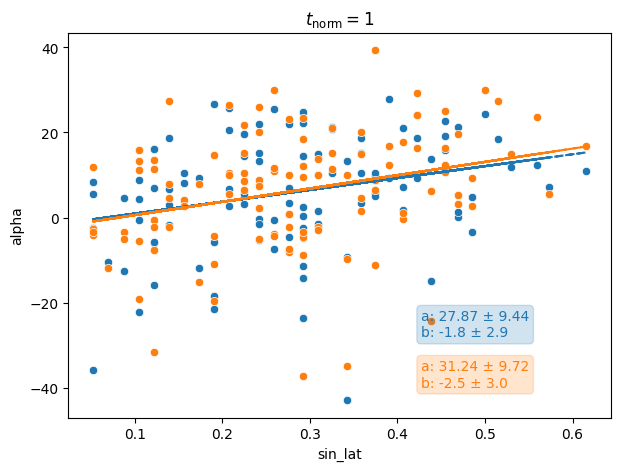

In [ ]:


f,ax=plt.subplots(1,2,figsize=(12,5))

db1=db[db['t_mean'].between(0.1,0.6)]
db1['sin_lat']=db1['lat'].apply(lambda x: np.sin(np.radians(np.abs(x))))
db1['lat']=db1['lat'].apply(lambda x: np.abs(x))


sns.scatterplot(data=db1,x='lat',y='alpha',ax=ax[0])
#sns.scatterplot(data=DFx2[DFx2.AR.isin(arshigh)],x='t_norm',y='fint',color='tab:orange',alpha=0.3,ax=ax1)

ax1.legend().remove()

ax2=ax[1]
sns.histplot(data=DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index(),x='flux',ax=ax2)
ax2.axvline(DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index().flux.median(),color='red',linestyle='--',linewidth=2,
            label=f'Median Flux: {DFx2[DFx2.t_mean==1].groupby("AR").mean().reset_index().flux.median():.2e} Mx')

ax2.set_ylabel('Number of ARs',fontsize=14)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_xlabel('Flux at $t_{max}$ [Mx]',fontsize=14)

ax1.text(0.05,0.9,'(a)',transform=ax1.transAxes,fontsize=24)
ax2.text(0.05,0.9,'(b)',transform=ax2.transAxes,fontsize=24)

f.tight_layout()
f.savefig('../figures/flux-all.pdf',dpi=300)


for tt in [0.2,0.6,1]:

  db1=db[db.t_mean==tt]
  db1['sin_lat']=db1['lat'].apply(lambda x: np.sin(np.radians(np.abs(x))))

  f,ax=plt.subplots(figsize=(7,5))

  for var in ['alpha','alphab']:
    res = stats.linregress(db1['sin_lat'].values, db1[var].values,alternative='greater')
    color='tab:blue' if var=='alpha' else 'tab:orange'
    sns.scatterplot(data=db1,x='sin_lat',y=var,ax=ax,color=color)
    ax.plot(db1['sin_lat'].values,res.slope*db1['sin_lat'].values+res.intercept,color=color,linestyle='--')
    ax.set_title(f'$t_\mathrm{{norm}} =${tt}')

    ax.text(
        0.65, 0.21 if var == 'alpha' else 0.08,
        f"a: {res.slope:.2f} ± {res.stderr:.2f}\nb: {res.intercept:.1f} ± {res.intercept_stderr:.1f}",
        color=color,
        transform=ax.transAxes,
        fontsize=10,
        bbox=dict(boxstyle="round", alpha=0.2, color=color)
    )
    rmse = ((db1[var] - (res.slope * db1['sin_lat'] + res.intercept)) ** 2).mean() ** 0.5

    print(f'RSME {var}: {rmse:.2f} deg; rho: {res.rvalue:.6f}')

  f.show()


/tmp/ipython-input-1961835744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1['sin_lat']=db1['lat'].apply(lambda x: np.sin(np.radians(np.abs(x))))
/tmp/ipython-input-1961835744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1['lat']=db1['lat'].apply(lambda x: np.abs(x))


RSME alpha: 16.03 deg; rho: 0.158561
RSME alphab: 18.68 deg; rho: 0.203441


/tmp/ipython-input-1961835744.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1['sin_lat']=db1['lat'].apply(lambda x: np.sin(np.radians(np.abs(x))))
/tmp/ipython-input-1961835744.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1['lat']=db1['lat'].apply(lambda x: np.abs(x))


RSME alpha: 13.28 deg; rho: 0.246275
RSME alphab: 13.59 deg; rho: 0.254208


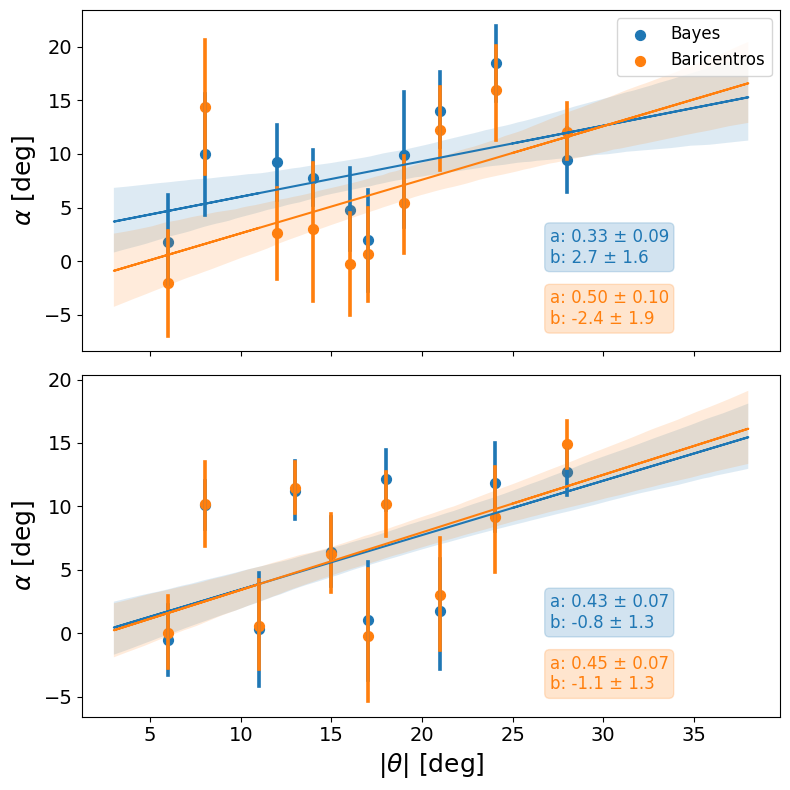

In [ ]:
f,ax=plt.subplots(2,1,figsize=(8,8),sharex=True)

db1=db[db['t_mean'].between(0.1,0.6)]
db1['sin_lat']=db1['lat'].apply(lambda x: np.sin(np.radians(np.abs(x))))
db1['lat']=db1['lat'].apply(lambda x: np.abs(x))


sns.regplot(data=db1,x='lat',y='alpha',ax=ax[0],x_bins=10,line_kws=dict(linestyle=None,alpha=0),label='Bayes')
#
sns.regplot(data=db1,x='lat',y='alphab',ax=ax[0],x_bins=10,line_kws=dict(linestyle=None,alpha=0),label='Baricentros')
ax[0].set_xlabel('')
for var in ['alpha','alphab']:
  res = stats.linregress(db1['lat'].values, db1[var].values,alternative='greater')
  color='tab:blue' if var=='alpha' else 'tab:orange'

  ax[0].plot(db1['lat'].values,res.slope*db1['lat'].values+res.intercept,color=color,linestyle='-')
  #ax[0].set_title(f'$t_\mathrm{{norm}} =${tt}')

  ax[0].text(
      0.67, 0.26 if var == 'alpha' else 0.08,
      f"a: {res.slope:.2f} ± {res.stderr:.2f}\nb: {res.intercept:.1f} ± {res.intercept_stderr:.1f}",
      color=color,
      transform=ax[0].transAxes,
      fontsize=12,
      bbox=dict(boxstyle="round", alpha=0.2, color=color)
  )
  rmse = ((db1[var] - (res.slope * db1['lat'] + res.intercept)) ** 2).mean() ** 0.5

  print(f'RSME {var}: {rmse:.2f} deg; rho: {res.rvalue:.6f}')

ax[0].legend(loc='upper right',fontsize=12)


db1=db[db.t_mean>0.6]
db1['sin_lat']=db1['lat'].apply(lambda x: np.sin(np.radians(np.abs(x))))
db1['lat']=db1['lat'].apply(lambda x: np.abs(x))


sns.regplot(data=db1,x='lat',y='alpha',ax=ax[1],x_bins=10,line_kws=dict(linestyle=None,alpha=0),label='Bayes')
#
sns.regplot(data=db1,x='lat',y='alphab',ax=ax[1],x_bins=10,line_kws=dict(linestyle=None,alpha=0),label='Baricentros')
ax[1].set_xlabel('')
for var in ['alpha','alphab']:
  res = stats.linregress(db1['lat'].values, db1[var].values,alternative='greater')
  color='tab:blue' if var=='alpha' else 'tab:orange'

  ax[1].plot(db1['lat'].values,res.slope*db1['lat'].values+res.intercept,color=color,linestyle='-')
  #ax[0].set_title(f'$t_\mathrm{{norm}} =${tt}')

  ax[1].text(
      0.67, 0.26 if var == 'alpha' else 0.08,
      f"a: {res.slope:.2f} ± {res.stderr:.2f}\nb: {res.intercept:.1f} ± {res.intercept_stderr:.1f}",
      color=color,
      transform=ax[1].transAxes,
      fontsize=12,
      bbox=dict(boxstyle="round", alpha=0.2, color=color)
  )
  rmse = ((db1[var] - (res.slope * db1['lat'] + res.intercept)) ** 2).mean() ** 0.5

  print(f'RSME {var}: {rmse:.2f} deg; rho: {res.rvalue:.6f}')

for ax1 in ax:
  ax1.set_ylabel(r'$\alpha$ [deg]',fontsize=18)
  ax1.tick_params(axis='both', labelsize=14)

ax[1].set_xlabel(r'$|\theta|$ [deg]',fontsize=18)

f.tight_layout()

f.savefig('/content/joy.pdf',dpi=300)

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2878584332.py:11: SyntaxWarning: invalid escape sequence '\m'
  ax.set_title(f'$t_\mathrm{{norm}} =${tt}')


RSME alpha: 14.91 deg; rho: 0.203219
RSME alphab: 16.38 deg; rho: 0.216635


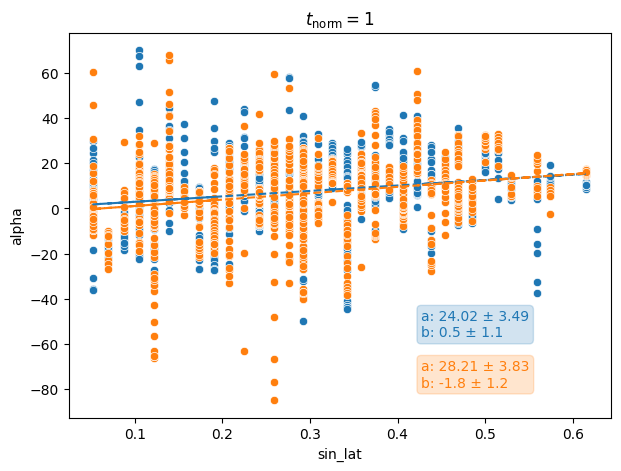

In [ ]:


db1=db
db1['sin_lat']=db1['lat'].apply(lambda x: np.sin(np.radians(np.abs(x))))

f,ax=plt.subplots(figsize=(7,5))

for var in ['alpha','alphab']:
  res = stats.linregress(db1['sin_lat'].values, db1[var].values,alternative='greater')
  color='tab:blue' if var=='alpha' else 'tab:orange'
  sns.scatterplot(data=db1,x='sin_lat',y=var,ax=ax,color=color)
  ax.plot(db1['sin_lat'].values,res.slope*db1['sin_lat'].values+res.intercept,color=color,linestyle='--')
  ax.set_title(f'$t_\mathrm{{norm}} =${tt}')

  ax.text(
      0.65, 0.21 if var == 'alpha' else 0.08,
      f"a: {res.slope:.2f} ± {res.stderr:.2f}\nb: {res.intercept:.1f} ± {res.intercept_stderr:.1f}",
      color=color,
      transform=ax.transAxes,
      fontsize=10,
      bbox=dict(boxstyle="round", alpha=0.2, color=color)
  )
  rmse = ((db1[var] - (res.slope * db1['sin_lat'] + res.intercept)) ** 2).mean() ** 0.5

  print(f'RSME {var}: {rmse:.2f} deg; rho: {res.rvalue:.6f}')

f.show()

In [ ]:
db1=db[db.t_mean==1]

# Sample data
x = db1['sin_lat'].values
y = db1['alphab'].values

# Reshape x to be a 2D array (column vector) for lstsq
X = x.reshape(-1, 1)

# Perform least squares fit with intercept forced to zero
# The 'rcond' parameter addresses potential issues with ill-conditioned matrices
m, residuals, rank, singular_values = np.linalg.lstsq(X, y, rcond=None)

# The slope (m) is the first (and only) element of the 'm' array
slope = m[0]

print(f"Slope (m): {slope}")
print(f"Equation: y = {slope:.2f}x")

Slope (m): 23.855145774429207
Equation: y = 23.86x


# SOME PLOTS

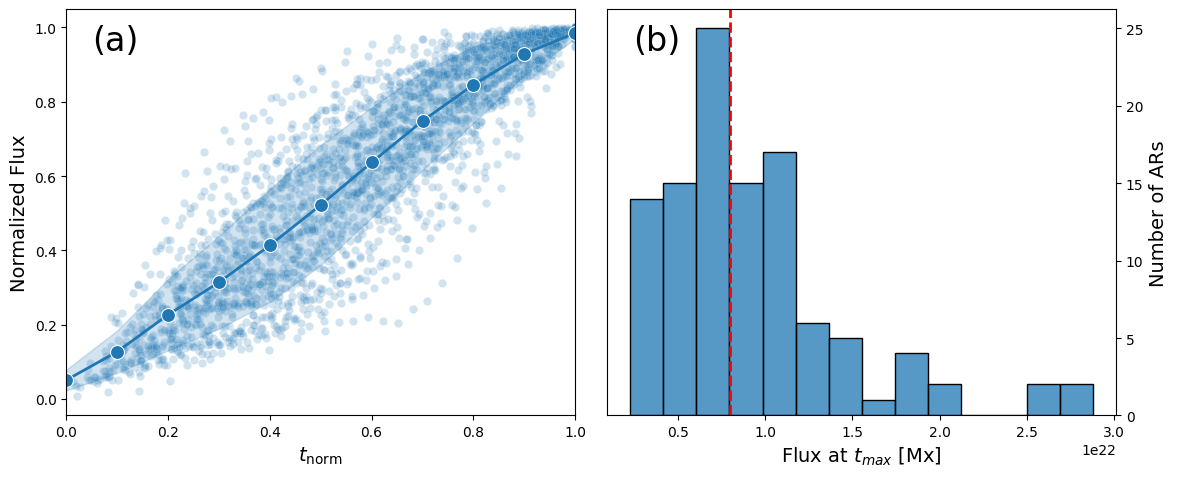

In [ ]:
'''
This plot shows the normalized flux vs normalized time for all active regions (ARs).
The flux is normalized by the maximum flux of each AR, and the time is normalized to 1
by the time of maximum flux. The plot includes scatter points for each data point.

'''



f,ax=plt.subplots(1,2,figsize=(12,5))

f,ax1=plotting.plot_single(DFx2,'fint',title='',scatter=True,fig=f,ax=ax[0])
ax1.set_ylabel('Normalized Flux',fontsize=14)
ax1.set_xlabel(r'$t_\mathrm{norm}$',fontsize=14)
ax1.set_xlim(0,1)
ax1.legend().remove()

dfm=DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index()

arshigh=dfm[dfm.flux>=dfm.flux.median()].AR.unique()
arslow=dfm[dfm.flux<dfm.flux.median()].AR.unique()

#sns.scatterplot(data=DFx2[DFx2.AR.isin(arshigh)],x='t_norm',y='fint',color='tab:orange',alpha=0.3,ax=ax1)

ax1.legend().remove()

ax2=ax[1]
sns.histplot(data=DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index(),x='flux',ax=ax2)
ax2.axvline(DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index().flux.median(),color='red',linestyle='--',linewidth=2,
            label=f'Median Flux: {DFx2[DFx2.t_mean==1].groupby("AR").mean().reset_index().flux.median():.2e} Mx')

ax2.set_ylabel('Number of ARs',fontsize=14)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_xlabel('Flux at $t_{max}$ [Mx]',fontsize=14)

ax1.text(0.05,0.9,'(a)',transform=ax1.transAxes,fontsize=24)
ax2.text(0.05,0.9,'(b)',transform=ax2.transAxes,fontsize=24)

f.tight_layout()
f.savefig('../figures/flux-all.pdf',dpi=300)

63
22
10
6


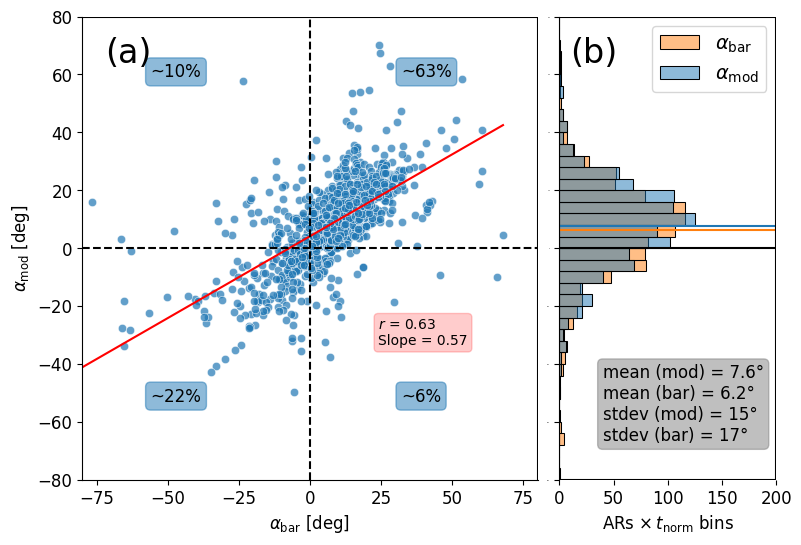

In [ ]:
db=DFx2[DFx2.t_mean<=1].groupby(['AR','t_mean']).mean().reset_index()
#
#
#  Jointplot de seaborn con histograma extendido en marg_y


g = sns.jointplot(
    data=db,
    x='alphab',
    y='alpha',
    kind='scatter',
    alpha=0.7,
    marginal_kws={'bins': 30,'binrange':(-80,80), 'fill': True},
    ratio=2,height=8,space=0.1)

g.set_axis_labels(r'$\alpha_\mathrm{bar}$ [deg]',r'$\alpha_\mathrm{mod}$ [deg]', fontsize=12)

g.ax_marg_x.set_visible(False)
#g.ax_marg_y.set_visible(False)
g.ax_marg_x.clear()
g.ax_marg_y.clear()
g.ax_marg_x.set_xlabel('X axis label')
g.ax_marg_y.set_ylabel('Y axis label')
g.ax_joint.tick_params(axis='both', labelsize=12)

#g.ax_marg_y.tick_params(axis='y', labelsize=12)

hist=sns.histplot(data=pd.melt(db,id_vars=['t_norm','lat','AR','fint','mag','flux'],value_vars=['alpha','alphab']),y='value',
                  hue='variable',
             palette=['tab:blue','tab:orange'],
             alpha=0.5,ax=g.ax_marg_y,binrange=(-80,80),bins=40)

# Linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(db['alphab'], db['alpha'])

# Add linear fit line
x_fit = np.linspace(db['alphab'].min(), db['alphab'].max(), 100)
y_fit = slope * x_fit + intercept
g.ax_joint.plot(x_fit, y_fit, color='red', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')

# Annotate with correlation coefficient and slope
g.ax_joint.text(
    0.65, 0.35,
    f'$r$ = {r_value:.2f}\nSlope = {slope:.2f}',
    transform=g.ax_joint.transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.2, color='red')
)

#g.ax_marg_y.legend()
g.ax_marg_y.legend(title='',labels=[r'$\alpha_\mathrm{bar}$',r'$\alpha_\mathrm{mod}$'],loc='upper right')
handles,labels=hist.get_legend_handles_labels()
#hist.legend(handles=handles,labels=labels,title=r'$t_{norm}$')
handles,labels=hist.get_legend_handles_labels()
g.ax_marg_y.set_ylabel('')
#
g.ax_marg_y.tick_params(axis='y', labelsize=10)  # Set y-ticklabel fontsize
g.ax_marg_y.tick_params(axis='x', labelsize=10)  # Set x-ticklabel fontsize (if needed)

g.ax_marg_y.axhline(0,color='black')

g.ax_marg_y.axhline(db.alpha.mean(),color='tab:blue')
g.ax_marg_y.axhline(db.alphab.mean(),color='tab:orange')

g.ax_joint.axvline(0,color='black',linestyle='dashed')
g.ax_joint.axhline(0,color='black',linestyle='dashed')
g.ax_joint.set_ylim(-80, 80)
g.ax_joint.set_xlim(-80, 80)

g.ax_marg_y.text(
    0.2, 0.25,
    f'mean (mod) = {db.alpha.mean():.1f}°\nmean (bar) = {db.alphab.mean():.1f}°\nstdev (mod) = {db.alpha.std():.0f}°\nstdev (bar) = {db.alphab.std():.0f}°',
    transform=g.ax_marg_y.transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='gray')
)

g.ax_marg_y.set_xlim(0,200)

g.ax_joint.plot([-80,80],[80,80],color='black')
g.ax_joint.plot([80,80],[-80,80],color='black')
g.ax_marg_y.plot([0,200],[-80,-80],color='black')
g.ax_marg_y.plot([0,200],[80,80],color='black')
g.ax_marg_y.plot([200,200],[-80,80],color='black')
g.ax_marg_y.tick_params(axis='y', labelsize=0)
g.ax_marg_y.tick_params(axis='x', labelsize=12)
g.ax_marg_y.set_xlabel(r'ARs $\times\, t_\mathrm{norm}$ bins',fontsize=12)

aa=db.alpha.values
ab=db.alphab.values



print(round(100*sum((aa>0)*(ab>0))/len(aa)))
print(round(100*sum((aa<0)*(ab<0))/len(aa)))
print(round(100*sum((aa>0)*(ab<0))/len(aa)))
print(round(100*sum((aa<0)*(ab>0))/len(aa)))

g.ax_joint.text(0.7,0.9,f'~{round(100*sum((aa>0)*(ab>0))/len(aa))}%',transform=g.ax_joint.transAxes,
                fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='tab:blue'))
g.ax_joint.text(0.15,0.9,f'~{round(100*sum((aa>0)*(ab<0))/len(aa))}%',transform=g.ax_joint.transAxes,
                fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='tab:blue'))
g.ax_joint.text(0.7,0.2,f'~{round(100*sum((aa<0)*(ab>0))/len(aa))}%',transform=g.ax_joint.transAxes,
                fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='tab:blue'))
g.ax_joint.text(0.15,0.2,f'~{round(100*sum((aa<0)*(ab<0))/len(aa))}%',transform=g.ax_joint.transAxes,
                fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='tab:blue'))


g.ax_joint.text(0.05,0.9,'(a)',transform=g.ax_joint.transAxes,fontsize=24)
g.ax_marg_y.text(0.05,0.9,'(b)',transform=g.ax_marg_y.transAxes,fontsize=24)

g.savefig('../figures/alpha-alpha.pdf',dpi=300)


63
22
10
6


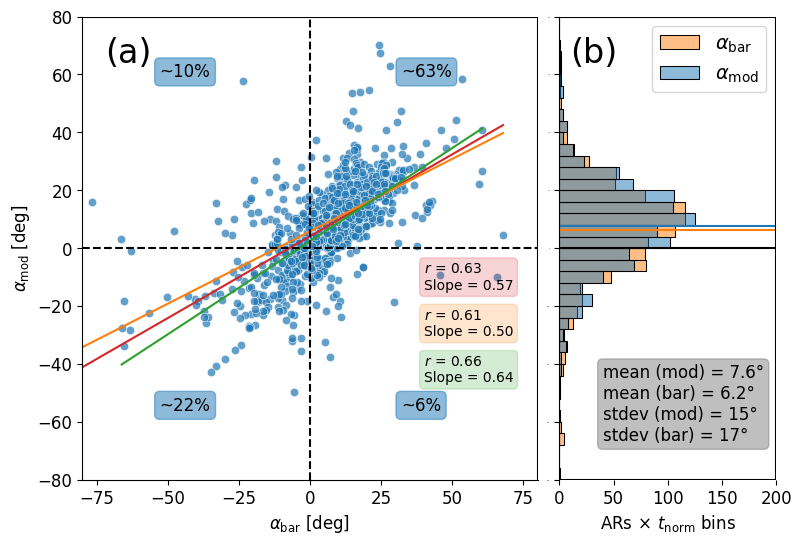

In [ ]:
db=DFx2[DFx2.t_mean<=1].groupby(['AR','t_mean']).mean().reset_index()
#
#
#  Jointplot de seaborn con histograma extendido en marg_y
arshigh=dfm[dfm.flux>=dfm.flux.median()].AR.unique()
dbh=db[db.AR.isin(arshigh)]
arslow=dfm[dfm.flux<dfm.flux.median()].AR.unique()
dbl=db[db.AR.isin(arslow)]

g = sns.jointplot(
    data=db,
    x='alphab',
    y='alpha',
    kind='scatter',
    alpha=0.7,
    marginal_kws={'bins': 30,'binrange':(-80,80), 'fill': True},
    ratio=2,height=8,space=0.1)

g.set_axis_labels(r'$\alpha_\mathrm{bar}$ [deg]',r'$\alpha_\mathrm{mod}$ [deg]', fontsize=12)

g.ax_marg_x.set_visible(False)
#g.ax_marg_y.set_visible(False)
g.ax_marg_x.clear()
g.ax_marg_y.clear()
g.ax_marg_x.set_xlabel('X axis label')
g.ax_marg_y.set_ylabel('Y axis label')
g.ax_joint.tick_params(axis='both', labelsize=12)

#g.ax_marg_y.tick_params(axis='y', labelsize=12)

hist=sns.histplot(data=pd.melt(db,id_vars=['t_norm','lat','AR','fint','mag','flux'],value_vars=['alpha','alphab']),y='value',
                  hue='variable',
             palette=['tab:blue','tab:orange'],
             alpha=0.5,ax=g.ax_marg_y,binrange=(-80,80),bins=40)

# Linear fit


for i,db1,color in zip([0,1,2],[db,dbh,dbl],['tab:red','tab:orange','tab:green']):
    slope, intercept, r_value, p_value, std_err = stats.linregress(db1['alphab'], db1['alpha'])

    # Add linear fit line
    x_fit = np.linspace(db1['alphab'].min(), db1['alphab'].max(), 100)
    y_fit = slope * x_fit + intercept
    g.ax_joint.plot(x_fit, y_fit, color=color, label=f'Fit: y={slope:.2f}x+{intercept:.2f}')


    # Annotate with correlation coefficient and slope
    g.ax_joint.text(
        0.75, 0.47-i/10,
        f'$r$ = {r_value:.2f}\nSlope = {slope:.2f}',
        transform=g.ax_joint.transAxes,
        fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle="round", alpha=0.2, color=color)
    )

#g.ax_marg_y.legend()
g.ax_marg_y.legend(title='',labels=[r'$\alpha_\mathrm{bar}$',r'$\alpha_\mathrm{mod}$'],loc='upper right')
handles,labels=hist.get_legend_handles_labels()
#hist.legend(handles=handles,labels=labels,title=r'$t_{norm}$')
handles,labels=hist.get_legend_handles_labels()
g.ax_marg_y.set_ylabel('')
#
g.ax_marg_y.tick_params(axis='y', labelsize=10)  # Set y-ticklabel fontsize
g.ax_marg_y.tick_params(axis='x', labelsize=10)  # Set x-ticklabel fontsize (if needed)

g.ax_marg_y.axhline(0,color='black')

g.ax_marg_y.axhline(db.alpha.mean(),color='tab:blue')
g.ax_marg_y.axhline(db.alphab.mean(),color='tab:orange')

g.ax_joint.axvline(0,color='black',linestyle='dashed')
g.ax_joint.axhline(0,color='black',linestyle='dashed')
g.ax_joint.set_ylim(-80, 80)
g.ax_joint.set_xlim(-80, 80)

g.ax_marg_y.text(
    0.2, 0.25,
    f'mean (mod) = {db.alpha.mean():.1f}°\nmean (bar) = {db.alphab.mean():.1f}°\nstdev (mod) = {db.alpha.std():.0f}°\nstdev (bar) = {db.alphab.std():.0f}°',
    transform=g.ax_marg_y.transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='gray')
)

g.ax_marg_y.set_xlim(0,200)

g.ax_joint.plot([-80,80],[80,80],color='black')
g.ax_joint.plot([80,80],[-80,80],color='black')
g.ax_marg_y.plot([0,200],[-80,-80],color='black')
g.ax_marg_y.plot([0,200],[80,80],color='black')
g.ax_marg_y.plot([200,200],[-80,80],color='black')
g.ax_marg_y.tick_params(axis='y', labelsize=0)
g.ax_marg_y.tick_params(axis='x', labelsize=12)
g.ax_marg_y.set_xlabel(r'ARs$\,\times\,t_\mathrm{norm}$ bins',fontsize=12)

aa=db.alpha.values
ab=db.alphab.values



print(round(100*sum((aa>0)*(ab>0))/len(aa)))
print(round(100*sum((aa<0)*(ab<0))/len(aa)))
print(round(100*sum((aa>0)*(ab<0))/len(aa)))
print(round(100*sum((aa<0)*(ab>0))/len(aa)))

g.ax_joint.text(0.7,0.9,f'~{round(100*sum((aa>0)*(ab>0))/len(aa))}%',transform=g.ax_joint.transAxes,
                fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='tab:blue'))
g.ax_joint.text(0.17,0.9,f'~{round(100*sum((aa>0)*(ab<0))/len(aa))}%',transform=g.ax_joint.transAxes,
                fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='tab:blue'))
g.ax_joint.text(0.7,0.18,f'~{round(100*sum((aa<0)*(ab>0))/len(aa))}%',transform=g.ax_joint.transAxes,
                fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='tab:blue'))
g.ax_joint.text(0.17,0.18,f'~{round(100*sum((aa<0)*(ab<0))/len(aa))}%',transform=g.ax_joint.transAxes,
                fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.5, color='tab:blue'))


g.ax_joint.text(0.05,0.9,'(a)',transform=g.ax_joint.transAxes,fontsize=24)
g.ax_marg_y.text(0.05,0.9,'(b)',transform=g.ax_marg_y.transAxes,fontsize=24)

g.savefig('../figures/alpha-alpha.pdf',dpi=300)


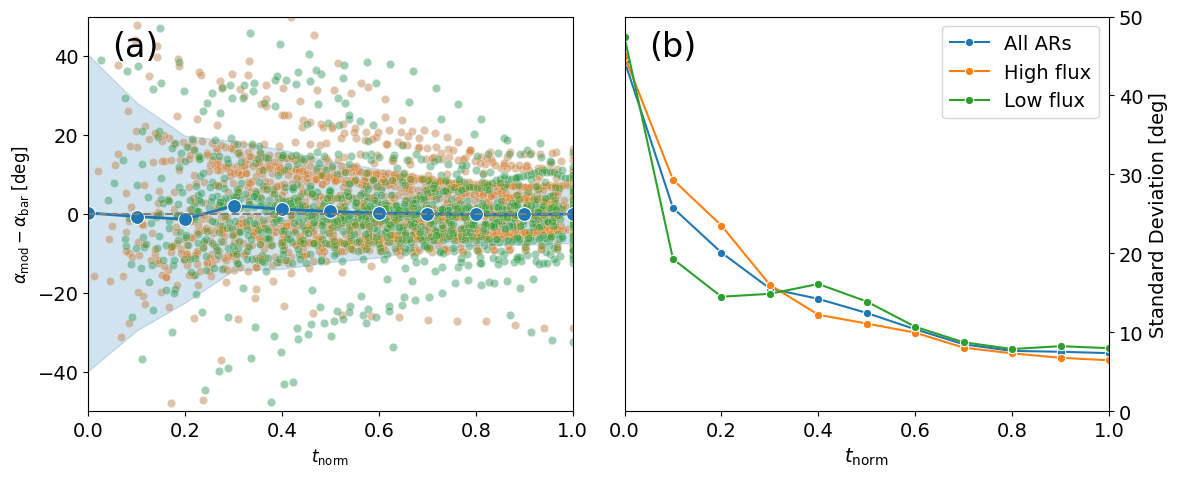

In [ ]:
'''
plot showing the difference between the modeled alpha and barycenter alpha
as a function of normalized time for all active regions (ARs).
Solid line represents the median difference at each normalized time.
The shaded-area plot represents the standard deviation of the difference at each normalized time,
with scatter points for individual data points. Solid dashed line at y=0 for reference.
'''
f,ax=plt.subplots(1,2,figsize=(12,5))

dfm=DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index()

arshigh=dfm[dfm.flux>=dfm.flux.median()].AR.unique()
arslow=dfm[dfm.flux<dfm.flux.median()].AR.unique()

f,ax1=plotting.plot_single(DFx2,'frac',title='',scatter=True,fig=f,ax=ax[0],estim='median')

sns.scatterplot(DFx2[DFx2.AR.isin(arshigh)],x='t_norm',y='frac',color='tab:orange',alpha=0.3,ax=ax1,label='High Flux ARs')
sns.scatterplot(DFx2[DFx2.AR.isin(arslow)],x='t_norm',y='frac',color='tab:green',alpha=0.3,ax=ax1,label='Low Flux ARs')

ax1.set_ylabel(r'$\alpha_\mathrm{mod} - \alpha_\mathrm{bar}$ [deg]')
ax1.set_xlabel(r'$t_\mathrm{norm}$')
ax1.set_xlim(0,1)
ax1.set_ylim(-50,50)
ax1.axhline(0,color='gray',ls='--')
ax1.legend().remove()

ax2=ax[1]
sns.lineplot(DFx2.groupby(['t_mean']).std().reset_index(),x='t_mean',y='frac',marker='o',ax=ax2,label='All ARs')
sns.lineplot(DFx2[DFx2.AR.isin(arshigh)].groupby(['t_mean']).std().reset_index(),x='t_mean',y='frac',
             marker='o',color='tab:orange',ax=ax2,label='High flux')
sns.lineplot(DFx2[DFx2.AR.isin(arslow)].groupby(['t_mean']).std().reset_index(),x='t_mean',y='frac',
             marker='o',color='tab:green',ax=ax2,label='Low flux')

ax2.set_ylim(0,50)

ax2.legend()

ax2.set_ylabel('Standard Deviation [deg]',fontsize=14)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_xlabel(r'$t_\mathrm{norm}$',fontsize=14)

ax1.text(0.05,0.9,'(a)',transform=ax1.transAxes,fontsize=24)
ax2.text(0.05,0.9,'(b)',transform=ax2.transAxes,fontsize=24)
ax2.set_xlim(0,1)

f.tight_layout()


f.savefig('../figures/alpha-err.pdf',dpi=300)

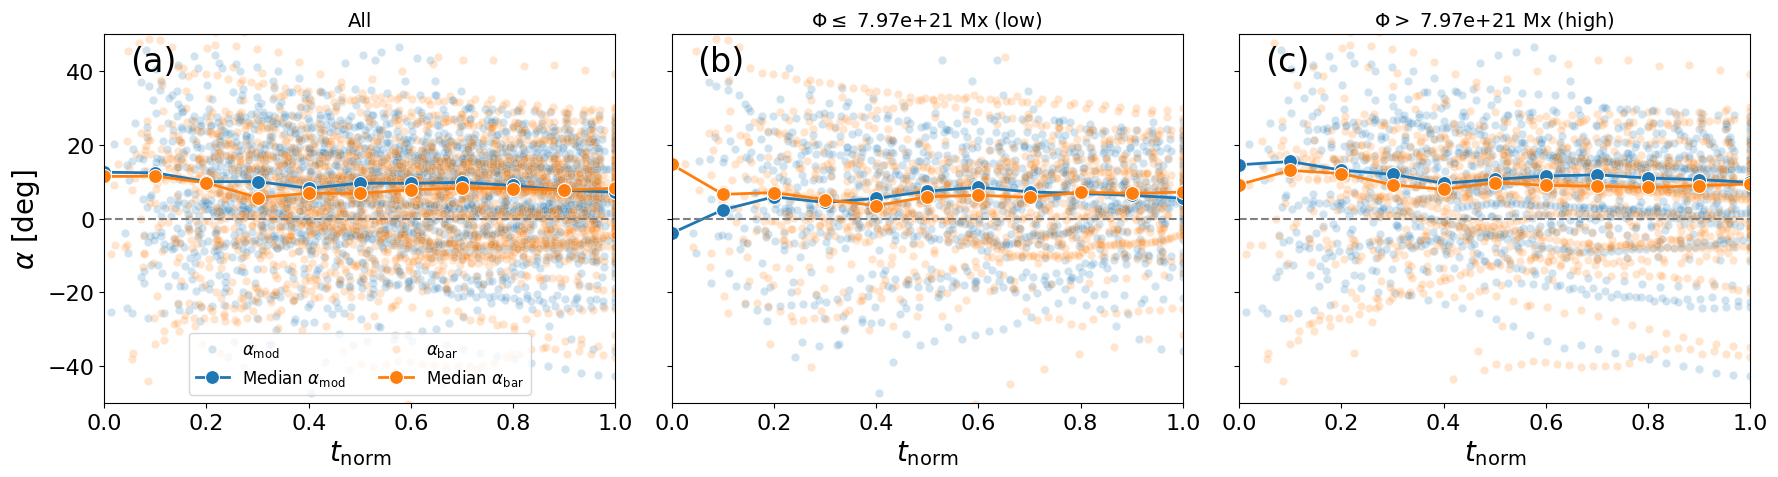

In [ ]:
'''
plot of alpha vs normalized time for all ARs, and for low and high flux subsets.
Solid lines represent the median alpha at each normalized time for both modeled and barycenter methods.
Scatter points represent individual data points. Solid dashed line at y=0 for reference.

'''



f,ax=plt.subplots(1,3,figsize=(18,5),sharey=True)



db=DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index()

arslowf=db[db.flux <= db.flux.median()].AR.unique()
arshighf=db[db.flux > db.flux.median()].AR.unique()


for db1,ax1,title in zip([DFx2,DFx2[DFx2.AR.isin(arslowf)],DFx2[DFx2.AR.isin(arshighf)]],ax,
                        ['All',rf'$\Phi \leq $ {db.flux.median():.2e} Mx (low)',rf'$\Phi > $ {db.flux.median():.2e} Mx (high)']):


    f,ax2=plotting.plot_single(db1,'alpha',title='',ax=ax1,fig=f,scatter=True,estim='median',
                               error=None,err_kws={'alpha':1},color='tab:blue',ls='-')
    f,ax2=plotting.plot_single(db1,'alphab',title='',ax=ax1,fig=f,color='tab:orange',scatter=True,
                               estim='median',
                               error=None,err_kws={'alpha':1},ls='-')
    ax1.set_ylabel(r'$\alpha$ [deg]',fontsize=20)
    ax1.set_xlabel(r'$t_\mathrm{norm}$',fontsize=20)
    ax1.tick_params(axis='both', which='major', labelsize=16)
    ax1.set_title(title)
    ax1.legend().remove()
    ax1.set_xlim(0,1)
    ax1.set_ylim(-50,50)
    ax1.axhline(0,color='gray',ls='--')



h,l=ax[0].get_legend_handles_labels()
ax[0].legend(ncols=2,fontsize=12,handles=h,labels=[r'$\alpha_\mathrm{mod}$',r'Median $\alpha_\mathrm{mod}$',r'$\alpha_\mathrm{bar}$',r'Median $\alpha_\mathrm{bar}$'],loc='lower center')

for i,ax1 in enumerate(ax):
    ax1.text(0.05,0.9,f'({chr(97+i)})',transform=ax1.transAxes,fontsize=24)

f.tight_layout()
f.savefig('../figures/alpha-vs-t_norm.pdf',dpi=300)

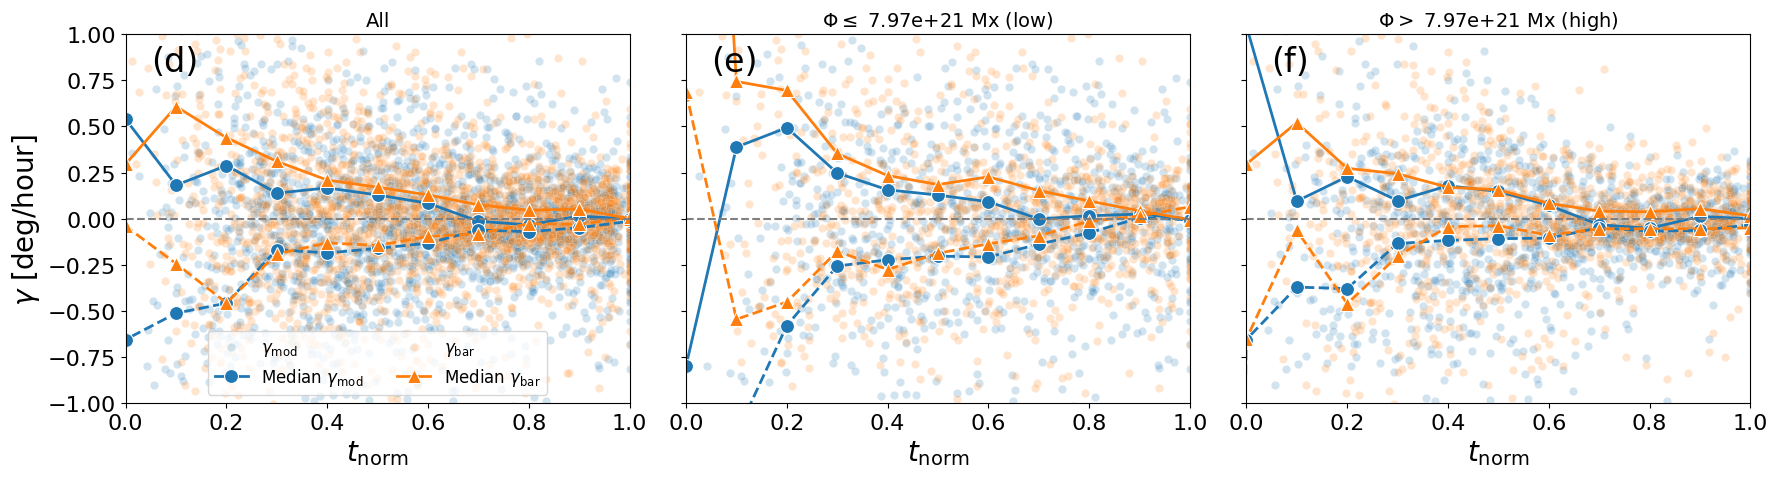

In [ ]:
'''
Plot of ARs rotations over time, separated by positive and negative cumulative rotation.
Solid lines represent the median alpha at each normalized time for both modeled and barycenter methods.
scatter points represent individual data points. Solid dashed line at y=0 for reference.
Each panel shows all ARs, low flux ARs, and high flux ARs respectively.

'''



f,ax=plt.subplots(1,3,figsize=(18,5),sharey=True)



db=DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index()

arslowf=db[db.flux <= db.flux.median()].AR.unique()
arshighf=db[db.flux > db.flux.median()].AR.unique()


for db1,ax1,title in zip([DFx2,DFx2[DFx2.AR.isin(arslowf)],DFx2[DFx2.AR.isin(arshighf)]],ax,
                        ['All',rf'$\Phi \leq $ {db.flux.median():.2e} Mx (low)',rf'$\Phi > $ {db.flux.median():.2e} Mx (high)']):

    dfm=db1.groupby('AR').mean().reset_index()

    arsp=dfm[dfm.rot_cum>0].AR.values
    arsn=dfm[dfm.rot_cum<0].AR.values

    # plot rot_cum in blue with circle marker and solid line
    f1,ax1=plotting.plot_single(db1[db1.AR.isin(arsp)],'rot',title='',marker='o',
                            color='tab:blue',error=None,estim='median',
                            err_kws={'alpha':1},ax=ax1,fig=f,scatter=True)


    # plot rot_cum in blue with circle marker and solid line
    f1,ax1=plotting.plot_single(db1[db1.AR.isin(arsn)],'rot',title='',marker='o'
                            ,color='tab:blue',error=None,estim='median',
                            err_kws={'alpha':1},ax=ax1,fig=f,scatter=True,ls='--')

    arsp=dfm[dfm.rotb_cum>0].AR.values
    arsn=dfm[dfm.rotb_cum<0].AR.values

    # plot rotb_cum in orange with triangle marker and dashed line
    f1,ax1=plotting.plot_single(db1[db1.AR.isin(arsp)],'rotb',title='',
                            ax=ax1,fig=f,marker='^',color='tab:orange',estim='median'
                            ,error=None,err_kws={'alpha':1},scatter=True)



    f1,ax1=plotting.plot_single(db1[db1.AR.isin(arsn)],'rotb',title='',
                            ax=ax1,fig=f,marker='^',color='tab:orange',estim='median',
                            error=None,err_kws={'alpha':1},scatter=True,ls='--')

    ax1.legend().remove()
    ax1.set_ylabel(r'$\gamma$ [deg/hour]',fontsize=20)
    ax1.set_xlabel(r'$t_\mathrm{norm}$',fontsize=20)
    ax1.tick_params(axis='both', which='major', labelsize=16)
    ax1.set_xlim(0,1)
    ax1.set_ylim(-1,1)
    ax1.axhline(0,color='gray',ls='--')
    ax1.set_title(title)

h,l=ax[0].get_legend_handles_labels()
ax[0].legend(ncols=2,fontsize=12,handles=[*h[0:2],*h[4:6]],
             labels=[r'$\gamma_\mathrm{mod}$',r'Median $\gamma_\mathrm{mod}$',r'$\gamma_\mathrm{bar}$',r'Median $\gamma_\mathrm{bar}$'],
             loc='lower center')

for i,ax1 in enumerate(ax):
    ax1.text(0.05,0.9,f'({chr(100+i)})',transform=ax1.transAxes,fontsize=24)

f.tight_layout()
f.savefig('../figures/gamma-vs-t_norm.pdf',dpi=300)

In [ ]:
h

<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\c'
<>:41: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\c'
<>:41: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_343005/3379829578.py:38: SyntaxWarning: invalid escape sequence '\m'
  ax1.text(100,15,f'$\mu$: {dbx.rot_cum.mean():.1f}$^\circ$\n$\sigma$: {dbx.rot_cum.std():.1f}$^\circ$\nskew: {dbx.rot_cum.skew():.2f}',
/tmp/ipykernel_343005/3379829578.py:38: SyntaxWarning: invalid escape sequence '\c'
  ax1.text(100,15,f'$\mu$: {dbx.rot_cum.mean():.1f}$^\circ$\n$\sigma$: {dbx.rot_cum

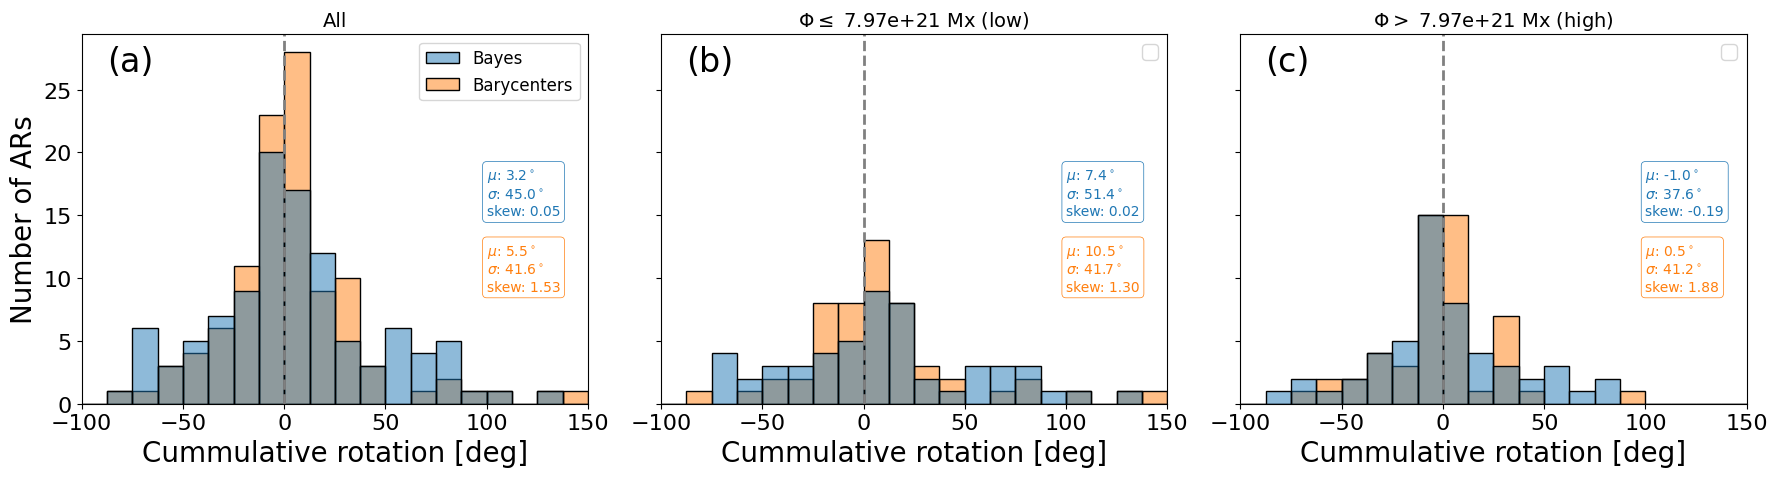

In [ ]:
'''
plot of cumulative rotation for all ARs, and for low and high flux subsets.
Histograms comparing the cumulative rotation calculated using the modeled alpha and barycenter alpha methods.
The cumulative rotation is calculated at the time of maximum flux (t_mean=1).

'''


f,ax=plt.subplots(1,3,figsize=(18,5),sharey=True)



db=DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index()

arslowf=db[db.flux <= db.flux.median()].AR.unique()
arshighf=db[db.flux > db.flux.median()].AR.unique()


for db1,ax1,title in zip([db,db[db.AR.isin(arslowf)],db[db.AR.isin(arshighf)]],ax,
                        ['All',rf'$\Phi \leq $ {db.flux.median():.2e} Mx (low)',rf'$\Phi > $ {db.flux.median():.2e} Mx (high)']):

    dbb=pd.melt(db1,value_vars=['rot_cum','rotb_cum'])
    dbb['variable']=dbb['variable'].replace({'rot_cum': 'Bayes', 'rotb_cum': 'Barycenters'})
    g=sns.histplot(data=dbb,x='value',hue='variable',fill=True,ax=ax1,binrange=(-100,150),bins=20)
    sns.move_legend(g, "upper right", title='',fontsize=12)
    ax1.set_xlabel(r'Cummulative rotation [deg]',fontsize=20)
    ax1.set_ylabel('Number of ARs',fontsize=20)
    ax1.tick_params(axis='both', which='major', labelsize=16)
    ax1.set_title(title)
    ax1.set_xlim(-100,150)
    #ax1.legend().remove()
    #ax1.legend(title='',fontsize=12)

    ax1.axvline(0,color='gray',linestyle='--',linewidth=2)

    dbx=db1[db1['rot_cum'].between(-100,150) | db1['rotb_cum'].between(-100,150)]

    ax1.text(100,15,f'$\mu$: {dbx.rot_cum.mean():.1f}$^\circ$\n$\sigma$: {dbx.rot_cum.std():.1f}$^\circ$\nskew: {dbx.rot_cum.skew():.2f}',
            color='tab:blue',fontsize=10,
            bbox=dict(facecolor='white', alpha=1,linewidth=0.5,edgecolor='tab:blue',boxstyle="round"))
    ax1.text(100,9,f'$\mu$: {dbx.rotb_cum.mean():.1f}$^\circ$\n$\sigma$: {dbx.rotb_cum.std():.1f}$^\circ$\nskew: {dbx.rotb_cum.skew():.2f}',
            color='tab:orange',fontsize=10,
            bbox=dict(facecolor='white', alpha=1,linewidth=0.5,edgecolor='tab:orange',boxstyle="round"))

ax[1].legend()
ax[2].legend()

for i,ax1 in enumerate(ax):
    ax1.text(0.05,0.9,f'({chr(97+i)})',transform=ax1.transAxes,fontsize=24)

f.tight_layout()



f.savefig('../figures/hist_cumrot.pdf',dpi=300)

<>:51: SyntaxWarning: invalid escape sequence '\m'
<>:51: SyntaxWarning: invalid escape sequence '\c'
<>:51: SyntaxWarning: invalid escape sequence '\c'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\c'
<>:54: SyntaxWarning: invalid escape sequence '\c'
<>:51: SyntaxWarning: invalid escape sequence '\m'
<>:51: SyntaxWarning: invalid escape sequence '\c'
<>:51: SyntaxWarning: invalid escape sequence '\c'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\c'
<>:54: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_343005/2445005860.py:51: SyntaxWarning: invalid escape sequence '\m'
  ax1.text(100,15,f'$\mu$: {db1.frac_rot.mean():.1f}$^\circ$\n$\sigma$: {db1.frac_rot.std():.1f}$^\circ$\nskew: {db1.frac_rot.skew():.2f}',
/tmp/ipykernel_343005/2445005860.py:51: SyntaxWarning: invalid escape sequence '\c'
  ax1.text(100,15,f'$\mu$: {db1.frac_rot.mean():.1f}$^\circ$\n$\sigma$: {db1.fra

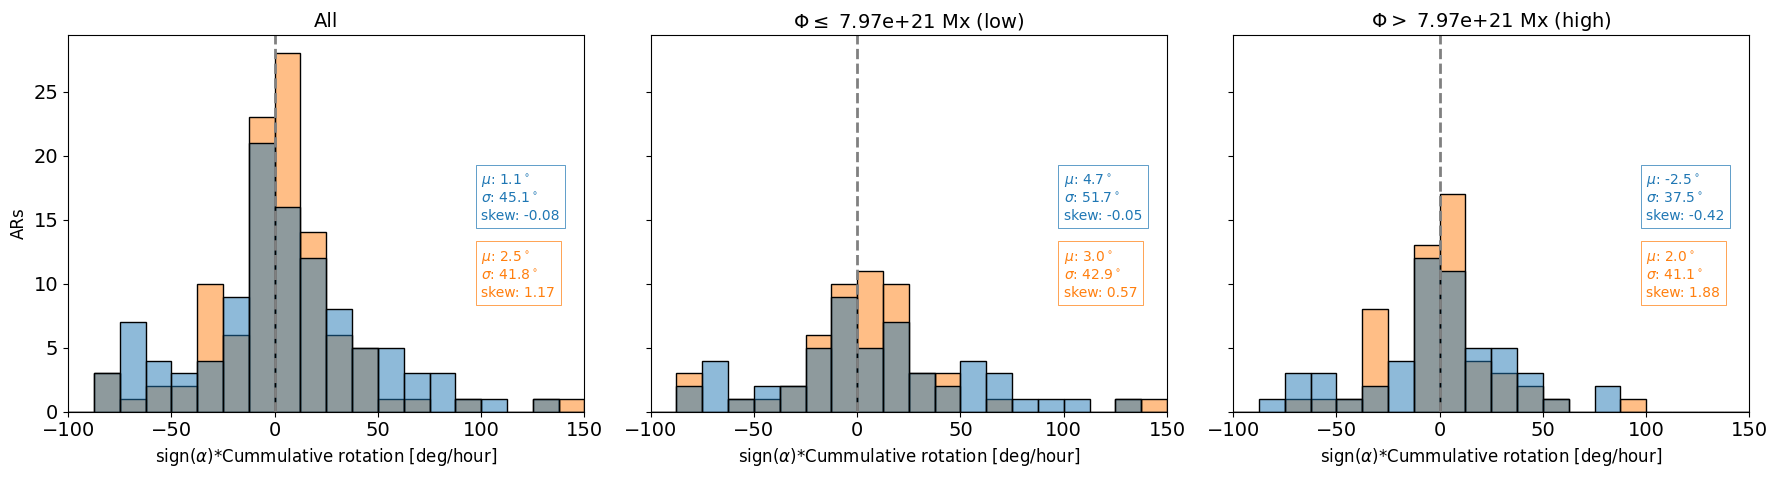

In [ ]:
'''
Este plot muestra histogramas de la rotación acumulada (gamma)
en el momento del flujo magnético máximo de las regiones activas (ARs).
Se divide en tres subplots: todos los ARs, ARs con flujo bajo y ARs con flujo alto.
Se calculan estadísticas como la media, desviación estándar y sesgo
para cada grupo y se muestran en el gráfico. Los valores extremos fuera del rango
de -200 a 200 se excluyen para una mejor visualización, ya que estos provienen de ARs
con valores muy pequeños de tilt al final de la emergencia que generan fracciones muy grandes.
'''


f,ax=plt.subplots(1,3,figsize=(18,5),sharey=True)



db=DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index()

db['frac_rot'] = np.sign(db['alpha'])*db['rot_cum']
db['frac_rotb'] = np.sign(db['alphab'])*db['rotb_cum']

# Crear máscaras para valores entre -5 y 5
mask_rot = (db['frac_rot'].between(-200, 200))
mask_rotb = (db['frac_rotb'].between(-200, 200))

# Aplicar las máscaras y reemplazar valores fuera del rango con NaN
db.loc[~mask_rot, 'frac_rot'] = np.nan
db.loc[~mask_rotb, 'frac_rotb'] = np.nan

# Alternativamente, si quieres mantener solo las filas que cumplen ambas condiciones:
db = db[mask_rot & mask_rotb]

arslowf=db[db.flux <= db.flux.median()].AR.unique()
arshighf=db[db.flux > db.flux.median()].AR.unique()


for db1,ax1,title in zip([db,db[db.AR.isin(arslowf)],db[db.AR.isin(arshighf)]],ax,
                        ['All',rf'$\Phi \leq $ {db.flux.median():.2e} Mx (low)',rf'$\Phi > $ {db.flux.median():.2e} Mx (high)']):
    sns.histplot(data=pd.melt(db1,
                            value_vars=['frac_rot','frac_rotb']),x='value',hue='variable',fill=True,ax=ax1,bins=20,binrange=(-100,150))

    ax1.set_xlabel(r'sign($\alpha$)*Cummulative rotation [deg/hour]')
    ax1.set_ylabel('ARs')
    ax1.set_title(title)
    ax1.set_xlim(-100,150)
    ax1.legend().remove()


    #ax1.legend(title='',labels=['Bayes','Barycenters'],fontsize=12)
    ax1.axvline(0,color='gray',linestyle='--',linewidth=2)

    ax1.text(100,15,f'$\mu$: {db1.frac_rot.mean():.1f}$^\circ$\n$\sigma$: {db1.frac_rot.std():.1f}$^\circ$\nskew: {db1.frac_rot.skew():.2f}',
            color='tab:blue',fontsize=10,
            bbox=dict(facecolor='white', alpha=1,linewidth=0.5,edgecolor='tab:blue'))
    ax1.text(100,9,f'$\mu$: {db1.frac_rotb.mean():.1f}$^\circ$\n$\sigma$: {db1.frac_rotb.std():.1f}$^\circ$\nskew: {db1.frac_rotb.skew():.2f}',
            color='tab:orange',fontsize=10,
            bbox=dict(facecolor='white', alpha=1,linewidth=0.5,edgecolor='tab:orange'))

f.tight_layout()
f.savefig('../figures/hist_cumrot2.pdf',dpi=300)


<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\c'
<>:32: SyntaxWarning: invalid escape sequence '\c'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\c'
<>:35: SyntaxWarning: invalid escape sequence '\c'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\c'
<>:32: SyntaxWarning: invalid escape sequence '\c'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\c'
<>:35: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_343005/1911394526.py:32: SyntaxWarning: invalid escape sequence '\m'
  ax1.text(100,10,f'$\mu$: {db1.rot_cum.mean():.1f}$^\circ$\n$\sigma$: {db1.rot_cum.std():.1f}$^\circ$\nskew: {db1.rot_cum.skew():.2f}',
/tmp/ipykernel_343005/1911394526.py:32: SyntaxWarning: invalid escape sequence '\c'
  ax1.text(100,10,f'$\mu$: {db1.rot_cum.mean():.1f}$^\circ$\n$\sigma$: {db1.rot_cum

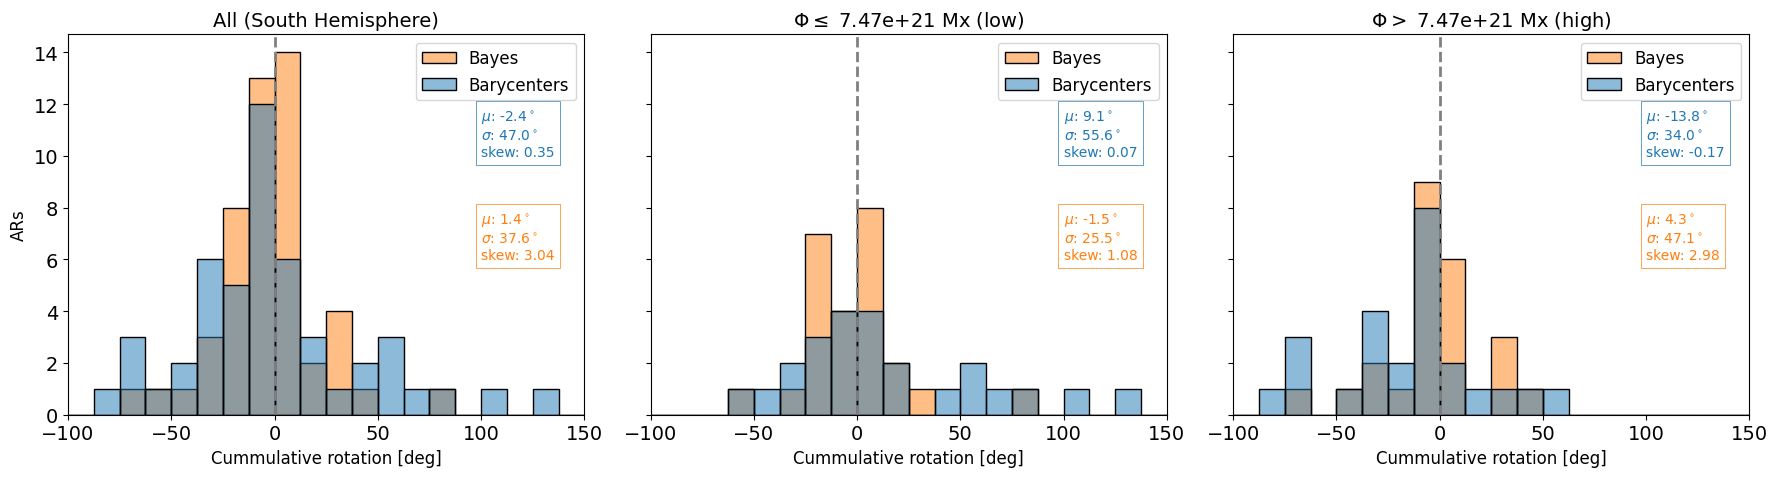

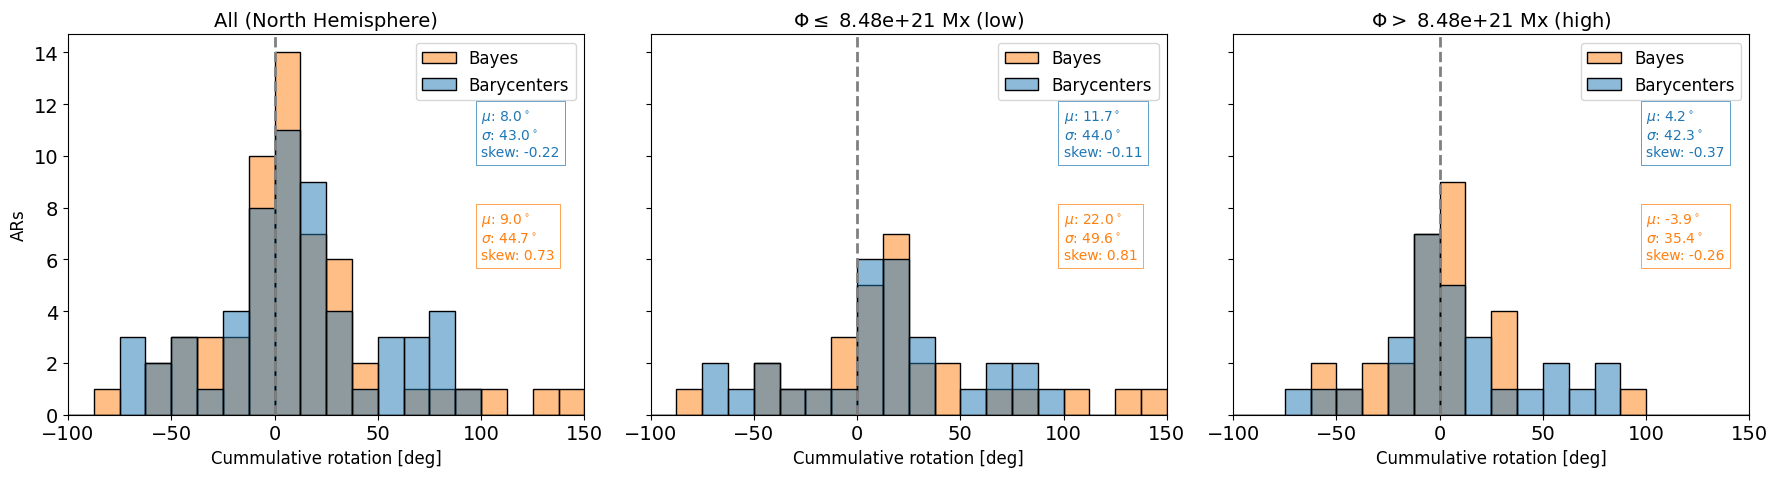

In [ ]:
'''
plot of cumulative rotation for all ARs, and for low and high flux subsets.
Histograms comparing the cumulative rotation calculated using the modeled alpha and barycenter alpha methods.
The cumulative rotation is calculated at the time of maximum flux (t_mean=1).

'''


for a,hem in [(-1,'South Hemisphere'),(1,'North Hemisphere')]:

    f,ax=plt.subplots(1,3,figsize=(18,5),sharey=True)
    db=DFx2[(DFx2.t_mean==1) & (DFx2.lat*a > 0)].groupby('AR').mean().reset_index()

    arslowf=db[db.flux <= db.flux.median()].AR.unique()
    arshighf=db[db.flux > db.flux.median()].AR.unique()


    for db1,ax1,title in zip([db,db[db.AR.isin(arslowf)],db[db.AR.isin(arshighf)]],ax,
                            [f'All ({hem})',rf'$\Phi \leq $ {db.flux.median():.2e} Mx (low)',rf'$\Phi > $ {db.flux.median():.2e} Mx (high)']):
        sns.histplot(data=pd.melt(db1,
                                value_vars=['rot_cum','rotb_cum']),x='value',hue='variable',fill=True,ax=ax1,binrange=(-100,150),bins=20)

        ax1.set_xlabel(r'Cummulative rotation [deg]')
        ax1.set_ylabel('ARs')
        ax1.set_title(title)
        ax1.set_xlim(-100,150)


        ax1.legend(title='',labels=['Bayes','Barycenters'],fontsize=12)
        ax1.axvline(0,color='gray',linestyle='--',linewidth=2)

        ax1.text(100,10,f'$\mu$: {db1.rot_cum.mean():.1f}$^\circ$\n$\sigma$: {db1.rot_cum.std():.1f}$^\circ$\nskew: {db1.rot_cum.skew():.2f}',
                color='tab:blue',fontsize=10,
                bbox=dict(facecolor='white', alpha=1,linewidth=0.5,edgecolor='tab:blue'))
        ax1.text(100,6,f'$\mu$: {db1.rotb_cum.mean():.1f}$^\circ$\n$\sigma$: {db1.rotb_cum.std():.1f}$^\circ$\nskew: {db1.rotb_cum.skew():.2f}',
                color='tab:orange',fontsize=10,
                bbox=dict(facecolor='white', alpha=1,linewidth=0.5,edgecolor='tab:orange'))

    f.tight_layout()
#    f.savefig('../figures/hist_cumrot.pdf',dpi=300)

$\rho_{mod}$: -0.28$
$\rho_{bar}$: -0.49$


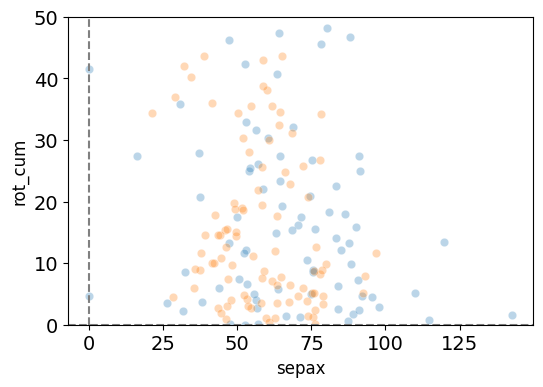

In [ ]:
db=DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index().abs()

sns.scatterplot(data=db,x='sepax',y='rot_cum',alpha=0.3)
sns.scatterplot(data=db,x='sar',y='rotb_cum',alpha=0.3)

plt.axvline(0,linestyle='--',color='gray')
plt.axhline(0,linestyle='--',color='gray')

plt.ylim(0,50)
print(rf'$\rho_{{mod}}$: {db["rot"].corr(db["sepax"]):.2f}$')
print(rf'$\rho_{{bar}}$: {db["rotb"].corr(db["sar"]):.2f}$')
#plt.text(30,20,rf'$\rho$: {db["alpha"].corr(db["rot"]):.2f}',color='tab:blue')
#plt.text(30,10,rf'$\rho$: {db["alphab"].corr(db["rotb"]):.2f}',color='tab:orange')

(-2.0, 2.0)

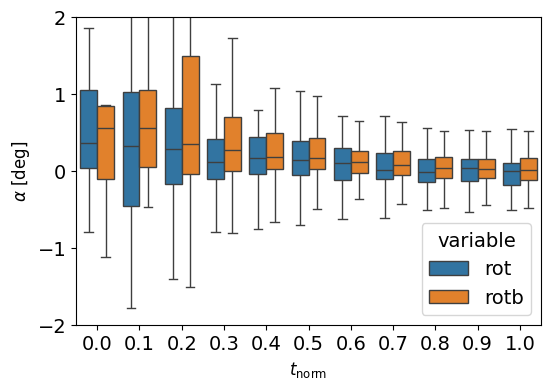

In [ ]:
mdf=pd.melt(DFx2,id_vars=['t_norm','t_mean','lat','AR','mag','flux'],value_vars=['rot','rotb'])
dfm=df.groupby('AR').mean().reset_index()

mdf=mdf[(mdf.t_norm>0) & (mdf.t_norm<1.05)]

arsp1=dfm[dfm.rot_cum>0].AR.values
arsp2=dfm[dfm.rotb_cum>0].AR.values
arsn1=dfm[dfm.rot_cum<0].AR.values
arsn2=dfm[dfm.rotb_cum<0].AR.values

# crear máscaras alineadas con el DataFrame completo
mask_pos_rot  = (mdf['variable']=='rot')  & (mdf['AR'].isin(arsp1))
mask_pos_rotb = (mdf['variable']=='rotb') & (mdf['AR'].isin(arsp2))
mdf_pos = mdf[mask_pos_rot | mask_pos_rotb]

mask_neg_rot  = (mdf['variable']=='rot')  & (mdf['AR'].isin(arsn1))
mask_neg_rotb = (mdf['variable']=='rotb') & (mdf['AR'].isin(arsn2))
mdf_neg = mdf[mask_neg_rot | mask_neg_rotb]

f,ax=plt.subplots()
#sns.lineplot(data=mdf,x='t_mean',y='value',estimator='mean',hue='variable',marker='o',errorbar='sd',err_style='bars')
sns.boxplot(data=mdf_pos,x='t_mean',y='value',hue='variable',ax=ax,fliersize=False)
#sns.boxplot(data=mdf_neg,x='t_mean',y='value',hue='variable',ax=ax,fliersize=False)
ax.set_ylabel(r'$\alpha$ [deg]')
ax.set_xlabel(r'$t_\mathrm{norm}$')
ax.set_ylim(-2,2)

# Joy Plots

In [8]:
import scipy

def theil_sen_ci(x, y, n_boot=1000, ci=95):
    slopes = []
    intercepts = []
    rng = np.random.default_rng()
    for _ in range(n_boot):
        idx = rng.choice(len(x), len(x), replace=True)
        try:
            res = scipy.stats.theilslopes(y[idx], x[idx])
            slopes.append(res[0])
            intercepts.append(res[1])
        except Exception:
            continue
    lower = (100 - ci) / 2
    upper = 100 - lower
    slope_ci = np.percentile(slopes, [lower, upper])
    intercept_ci = np.percentile(intercepts, [lower, upper])
    return np.mean(slopes), np.mean(intercepts), slope_ci, intercept_ci

In [89]:
# === Crear eje x superior ===
ax_top = ax1.secondary_xaxis(
    "top",
    functions=(
        lambda x: x * (db1.frac.mean() / db1.frac_sin.mean()),
        lambda x: x * (db1.frac_sin.mean() / db1.frac.mean())
    )
)

ax_top.set_xlabel("frac / fracb", fontsize=10)


Text(0.5, 0, 'frac / fracb')

<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\s'
<>:70: SyntaxWarning: invalid escape sequence '\m'
<>:70: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\s'
<>:70: SyntaxWarning: invalid escape sequence '\m'
<>:70: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2398179820.py:31: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_title(f'$t_\mathrm{{norm}}$ = {tt:.1f}--{tt+0.1:.1f} (N={len(dbA[dbA['t_mean'].between(tt,tt+0.1)].frac_sin.values)})')
/tmp/ipython-input-2398179820.py:62: SyntaxWarning: invalid escape sequence '\m'
  f'$\mu$ ={dbA[dbA['t_mean'].between(tt,tt+0.1)].frac_sin.mean():.1f}°\n$\sigma$={dbA[dbA['t_mean'].between(tt,tt+0.1)].frac_sin.std():.1f}°',
/tmp/ipython-input-2398179820.py:62: SyntaxWarning: in

(-266,317)
(-291,332)
24.4,73.6,-0.3
21.6,74.9,-0.2


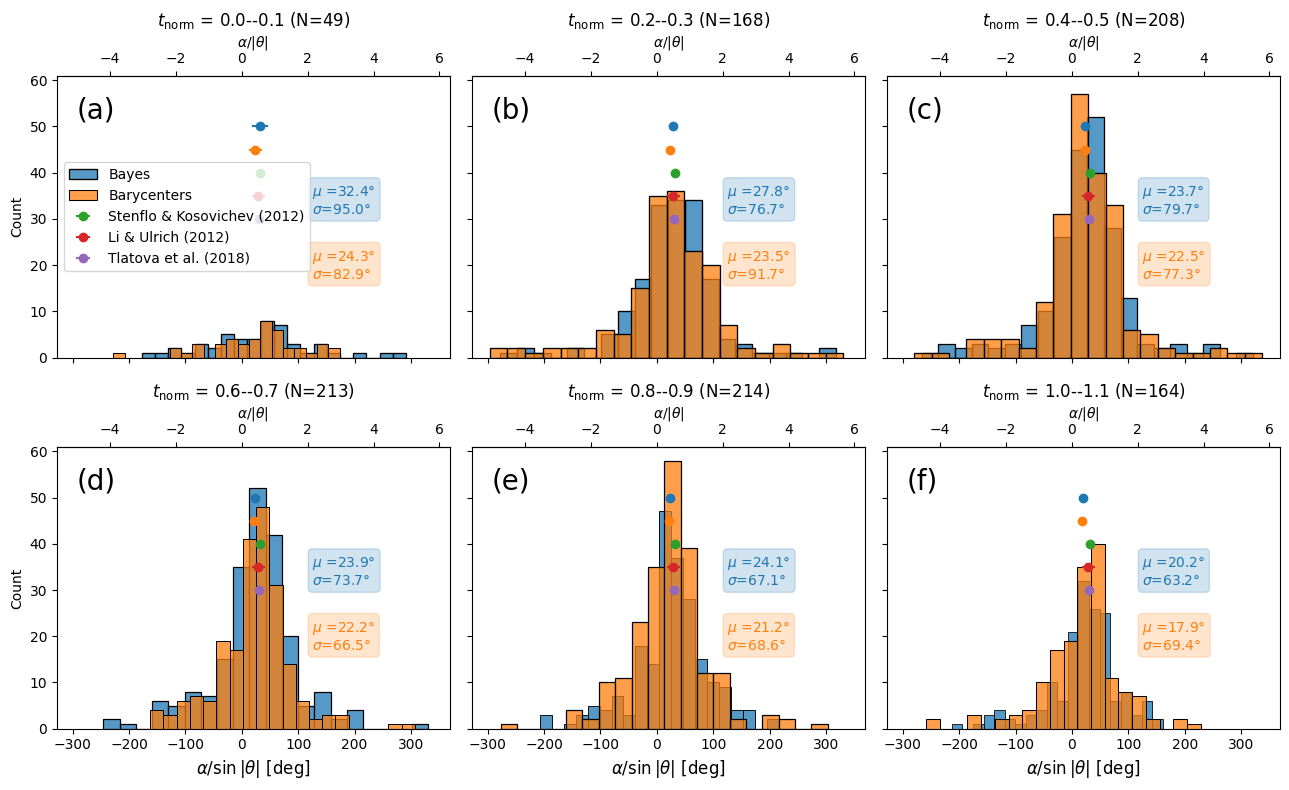

In [127]:
limits=(-300,340)

db=DFx2[DFx2['t_mean'].between(0.8,1.1)]

db['lat']=np.abs(db['lat'])

db1=DFx2[DFx2['t_mean'].between(0,1.1)].groupby(['AR','t_mean']).mean().reset_index()
db1['lat']=np.abs(db1['lat'])
db1=db1.assign(frac_sin= lambda x: x.alpha/np.sin(np.deg2rad(x.lat)))
db1=db1.assign(fracb_sin= lambda x: x.alphab/np.sin(np.deg2rad(x.lat)))

db1=db1.assign(frac= lambda x: x.alpha/x.lat)
db1=db1.assign(fracb= lambda x: x.alphab/x.lat)


print(f'({db1.frac_sin.mean()-3*db1.frac_sin.std():.0f},{db1.frac_sin.mean()+3*db1.frac_sin.std():.0f})')
print(f'({db1.fracb_sin.mean()-3*db1.fracb_sin.std():.0f},{db1.fracb_sin.mean()+3*db1.fracb_sin.std():.0f})')


dbA=db1[db1['frac_sin'].between(*limits)]
dbB=db1[db1['fracb_sin'].between(*limits)]


f,ax=plt.subplots(2,3,figsize=(13,8),sharey=True,sharex=True)

for (i,tt),ax1 in zip(enumerate(np.sort(dbA.t_mean.unique())[::2]),ax.flatten()):

  sns.histplot(data=dbA[dbA['t_mean'].between(tt,tt+0.1)],x='frac_sin',ax=ax1,bins=20,label='Bayes')
  sns.histplot(data=dbB[dbB['t_mean'].between(tt,tt+0.1)],x='fracb_sin',ax=ax1,bins=20,label='Barycenters')

  ax1.set_title(f'$t_\mathrm{{norm}}$ = {tt:.1f}--{tt+0.1:.1f} (N={len(dbA[dbA['t_mean'].between(tt,tt+0.1)].frac_sin.values)})')
  ax1.set_xlabel(r'$\alpha / \sin{|\theta|}$ [deg]',fontsize=12)

  ax1.errorbar(g1(0.56),40,xerr=g1(0.01),fmt='o',color='tab:green',label='Stenflo & Kosovichev (2012)')
  ax1.errorbar(dbA[dbA['t_mean'].between(tt,tt+0.1)]['frac_sin'].mean(),50,xerr=dbA[dbA['t_mean'].between(tt,tt+0.1)]['frac_sin'].std()/np.sqrt(len(dbA[dbA['t_mean'].between(tt,tt+0.1)]['frac_sin'].values)),fmt='o',color='tab:blue')
  ax1.errorbar(dbB[dbB['t_mean'].between(tt,tt+0.1)]['fracb_sin'].mean(),45,
               xerr=dbB[dbB['t_mean'].between(tt,tt+0.1)]['fracb_sin'].std()/np.sqrt(len(dbB[dbB['t_mean'].between(tt,tt+0.1)]['fracb_sin'].values)),fmt='o',color='tab:orange')
  ax1.errorbar(g1(0.5),35,xerr=g1(0.2),fmt='o',color='tab:red',label='Li & Ulrich (2012)')
  ax1.errorbar(g1(0.53),30,xerr=g1(0.01),fmt='o',color='tab:purple',label='Tlatova et al. (2018)')


  #ax1.axvline(32.1,linestyle='--',linewidth=2,label='Stenflo & Kosovichev (2012)',color='tab:green')
  #ax1.axvline(0,linestyle='--',linewidth=2,color='gray')
  #ax1.axvline(dbA[dbA['t_mean'].between(tt,tt+0.1)]['frac_sin'].mean(),linestyle='--',linewidth=2,color='tab:blue')
  #ax1.axvline(dbB[dbB['t_mean'].between(tt,tt+0.1)]['fracb_sin'].mean(),linestyle='--',linewidth=2,color='tab:orange')
  f1 = lambda x: x * (dbB.fracb.mean() / dbB.fracb_sin.mean())      # primary → secondary
  g1 = lambda u: u * (dbB.fracb_sin.mean() / dbB.fracb.mean())      # secondary → primary
  # === Nuevo eje superior ===
  ax_top = ax1.secondary_xaxis(
      "top",
      functions=(
          f1,
          g1)
      )

  ax_top.set_xlabel(r'$\alpha / |\theta|$', fontsize=10)

#  ax1.axvline(g1(0.5),linestyle='--',linewidth=2,label='Li & Ulrich (2012)',color='tab:red')

  ax1.text(
    0.65, 0.51,
    f'$\mu$ ={dbA[dbA['t_mean'].between(tt,tt+0.1)].frac_sin.mean():.1f}°\n$\sigma$={dbA[dbA['t_mean'].between(tt,tt+0.1)].frac_sin.std():.1f}°',
    color='tab:blue',
    transform=ax1.transAxes,
    fontsize=10,
    bbox=dict(boxstyle="round", alpha=0.2, color='tab:blue')
    )
  ax1.text(
    0.65, 0.28,
    f'$\mu$ ={dbB[dbB['t_mean'].between(tt,tt+0.1)].fracb_sin.mean():.1f}°\n$\sigma$={dbB[dbB['t_mean'].between(tt,tt+0.1)].fracb_sin.std():.1f}°',
    color='tab:orange',
    transform=ax1.transAxes,
    fontsize=10,
    bbox=dict(boxstyle="round", alpha=0.2, color='tab:orange')
    )

  ax1.text(0.05,0.85,f'({chr(97+i)})',transform=ax1.transAxes,fontsize=20)

ax[0,0].legend()
f.tight_layout()

print(f'{dbA.frac_sin.mean():.1f},{dbA.frac_sin.std():.1f},{dbA.frac_sin.skew():.1f}')
print(f'{dbB.fracb_sin.mean():.1f},{dbB.fracb_sin.std():.1f},{dbB.fracb_sin.skew():.1f}')

f.savefig('../figures/hist_sin_alpha.pdf',dpi=300)




In [107]:
dbA[dbA['t_mean'].between(tt,tt+0.1)]['frac_sin'].mean()/np.sqrt(len(dbA[dbA['t_mean'].between(tt,tt+0.1)]['frac_sin'].values))

np.float64(7.418253689708789)

In [ ]:
np.sort(dbA.t_mean.unique())[::2]

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

<>:39: SyntaxWarning: invalid escape sequence '\P'
<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\P'
<>:45: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2650827618.py:39: SyntaxWarning: invalid escape sequence '\P'
  ax[s].set_title(f'$\Phi$ {"low" if s==0 else "high"}')
/tmp/ipython-input-2650827618.py:45: SyntaxWarning: invalid escape sequence '\m'
  ax[s].set_xlabel(f'$t_\mathrm{{norm}}$ interval',fontsize=12)


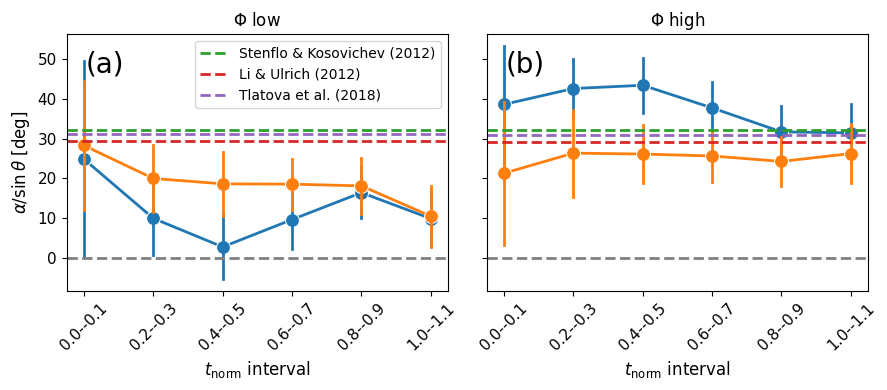

In [128]:

db=DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index()

arslowf=db[db.flux <= db.flux.median()].AR.unique()
arshighf=db[db.flux > db.flux.median()].AR.unique()
db1=DFx2[DFx2['t_mean'].between(0,1.1)].groupby(['AR','t_mean']).mean().reset_index()
db1['lat']=np.abs(db1['lat'])
db1=db1.assign(frac_sin= lambda x: x.alpha/np.sin(np.deg2rad(x.lat)))
db1=db1.assign(fracb_sin= lambda x: x.alphab/np.sin(np.deg2rad(x.lat)))
db1=db1.assign(frac= lambda x: x.alpha/x.lat)
db1=db1.assign(fracb= lambda x: x.alphab/x.lat)


f,ax=plt.subplots(1,2,figsize=(9,4),sharey=True)
ax=ax.flatten()
for s,ars in enumerate([arslowf,arshighf]):
  db2=db1[db1.AR.isin(ars)]
  dbA=db2[db2['frac_sin'].between(*limits)]
  dbB=db2[db2['fracb_sin'].between(*limits)]

  f1 = lambda x: x * (dbB.fracb.mean() / dbB.fracb_sin.mean())      # primary → secondary
  g1 = lambda u: u * (dbB.fracb_sin.mean() / dbB.fracb.mean())      # secondary → primary
  l=[]
  for tt in np.sort(dbA.t_mean.unique())[::2]:
    l.append(dbA[dbA['t_mean'].between(tt,tt+0.1)].assign(Method='Bayes',interval=f'{tt:.1f}--{tt+0.1:.1f}'))
    l.append(dbB[dbB['t_mean'].between(tt,tt+0.1)].assign(Method='Barycenters',
                                                          interval=f'{tt:.1f}--{tt+0.1:.1f}',
                                                          frac_sin= lambda x: x.alphab/np.sin(np.deg2rad(x.lat))))

  DFT=pd.concat(l)

  #sns.boxplot(data=DFT,x='interval',y='frac_sin',hue='Method', showfliers=False,ax=ax[s])
  # Calculate means for each group and category
  mean_values = DFT.groupby(['interval', 'Method']).mean().reset_index()

  # Add the lineplot connecting the means
  sns.lineplot(x='interval', y='frac_sin', hue='Method', data=DFT, marker='o',estimator='mean',errorbar='se',
               err_style='bars', linewidth=2, color='red', legend=False,ax=ax[s], markersize=10, err_kws={'capsize': 0, 'elinewidth': 2})
#  sns.lineplot(x='interval', y='frac_sin', hue='Method', data=mean_values, marker='o',errorbar='sd', linestyle='-', color='red', legend=False,ax=ax[s])
  ax[s].set_title(f'$\Phi$ {"low" if s==0 else "high"}')

  ax[s].axhline(0,linestyle='--',color='gray',linewidth=2)
  ax[s].axhline(32.1,linestyle='--',color='tab:green',linewidth=2,label='Stenflo & Kosovichev (2012)')
  ax[s].axhline(g1(0.5),linestyle='--',color='tab:red',linewidth=2,label='Li & Ulrich (2012)')
  ax[s].axhline(g1(0.53),linestyle='--',color='tab:purple',linewidth=2,label='Tlatova et al. (2018)')
  ax[s].set_xlabel(f'$t_\mathrm{{norm}}$ interval',fontsize=12)
  ax[s].set_ylabel(r'$\alpha/\sin{\theta}$ [deg]',fontsize=12)
  ax[s].tick_params(axis='both', which='major', labelsize=11)
  ax[s].tick_params(axis='x', labelrotation=45)

  ax[s].text(0.05,0.85,f'({chr(97+s)})',transform=ax[s].transAxes,fontsize=20)

ax[0].legend()

f.tight_layout()


f.savefig('../figures/sin_alpha_interval.pdf',dpi=300)

<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-326649989.py:31: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_title(f'$t_\mathrm{{norm}}$ = {tt:.1f}--{tt+0.1:.1f} (N={len(dbA[dbA['t_mean'].between(tt,tt+0.1)].frac_sin.values)})')
/tmp/ipython-input-326649989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['lat']=np.abs(db['lat'])


(-266,317)
(-291,332)


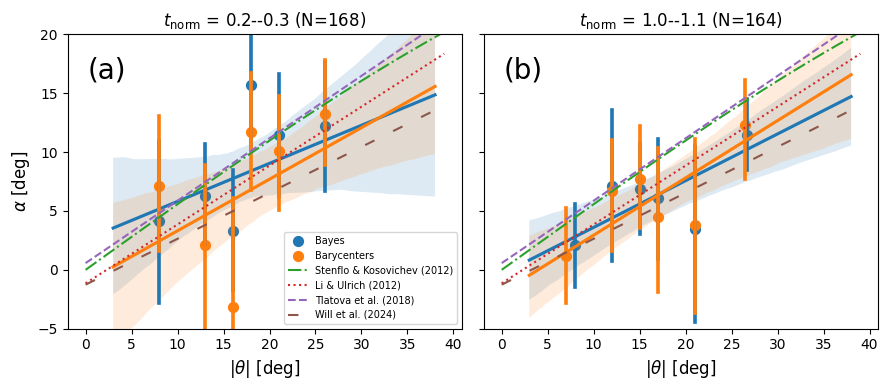

In [162]:
limits=(-300,340)

db=DFx2[DFx2['t_mean'].between(0.8,1.1)]

db['lat']=np.abs(db['lat'])

db1=DFx2[DFx2['t_mean'].between(0,1.1)].groupby(['AR','t_mean']).mean().reset_index()
db1['lat']=np.abs(db1['lat'])
db1=db1.assign(frac_sin= lambda x: x.alpha/np.sin(np.deg2rad(x.lat)))
db1=db1.assign(fracb_sin= lambda x: x.alphab/np.sin(np.deg2rad(x.lat)))

db1=db1.assign(frac= lambda x: x.alpha/x.lat)
db1=db1.assign(fracb= lambda x: x.alphab/x.lat)


print(f'({db1.frac_sin.mean()-3*db1.frac_sin.std():.0f},{db1.frac_sin.mean()+3*db1.frac_sin.std():.0f})')
print(f'({db1.fracb_sin.mean()-3*db1.fracb_sin.std():.0f},{db1.fracb_sin.mean()+3*db1.fracb_sin.std():.0f})')


dbA=db1[db1['frac_sin'].between(*limits)]
dbB=db1[db1['fracb_sin'].between(*limits)]


f,ax=plt.subplots(1,2,figsize=(9,4),sharey=True)

for (i,tt),ax1 in zip(enumerate([0.2,1.0]),ax.flatten()):

  sns.regplot(data=dbA[dbA['t_mean'].between(tt,tt+0.1)],x='lat',y='alpha',ax=ax1,x_bins=6,label='Bayes')
  sns.regplot(data=dbB[dbB['t_mean'].between(tt,tt+0.1)],x='lat',y='alphab',ax=ax1,x_bins=6,label='Barycenters')

  ax1.set_title(f'$t_\mathrm{{norm}}$ = {tt:.1f}--{tt+0.1:.1f} (N={len(dbA[dbA['t_mean'].between(tt,tt+0.1)].frac_sin.values)})')
  ax1.set_ylabel('')
  if i in [0,3]:
    ax1.set_ylabel(r'$\alpha$ [deg]',fontsize=12)

  ax1.set_xlabel(r'$|\theta|$ [deg]',fontsize=12)

  ax1.set_ylim(-5,20)

  x=np.arange(0,40)

  ax1.plot(x,32.1*np.sin(np.deg2rad(x)),linestyle='-.',color='tab:green',label='Stenflo & Kosovichev (2012)')
  ax1.plot(x,180*(0.5*np.deg2rad(x)-0.02)/np.pi,linestyle=':',color='tab:red',label='Li & Ulrich (2012)')
  ax1.plot(x,180*(0.53*np.deg2rad(x)+0.01)/np.pi,linestyle='--',color='tab:purple',label='Tlatova et al. (2018)')
  ax1.plot(x,0.39*x-1.26,linestyle=(0, (5, 10)),color='tab:brown',label='Will et al. (2024)')






#  ax1.axvline(g1(0.5),linestyle='--',linewidth=2,label='Li & Ulrich (2012)',color='tab:red')


  ax1.text(0.05,0.85,f'({chr(97+i)})',transform=ax1.transAxes,fontsize=20)

ax[0].legend(fontsize=7)
f.tight_layout()

f.savefig('../figures/reg_sin_alpha.pdf',dpi=300)



<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:48: SyntaxWarning: invalid escape sequence '\m'
<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:56: SyntaxWarning: invalid escape sequence '\m'
<>:56: SyntaxWarning: invalid escape sequence '\s'
<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:48: SyntaxWarning: invalid escape sequence '\m'
<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:56: SyntaxWarning: invalid escape sequence '\m'
<>:56: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1174389414.py:43: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_title(f'$t_\mathrm{{norm}}$ = {tt:.1f}--{tt+0.1:.1f} (N={len(dbA[dbA['t_mean'].between(tt,tt+0.1)].frac_sin.values)})')
/tmp/ipython-input-1174389414.py:48: SyntaxWarning: invalid escape sequence '\m'
  f'$\mu$ ={dbA[dbA['t_mean'].between(tt,tt+0.1)].frac_sin.mean():.1f}°\n$\sigma$={dbA[dbA['t_mean'].between(tt,tt+0.1)].frac_sin.std():.1f}°',
/tmp/ipython-input-1174389414.py:48: SyntaxWarning: in

(-327,348)
(-347,374)


/tmp/ipython-input-1174389414.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['lat']=np.abs(db['lat'])


(-190,270)
(-226,280)


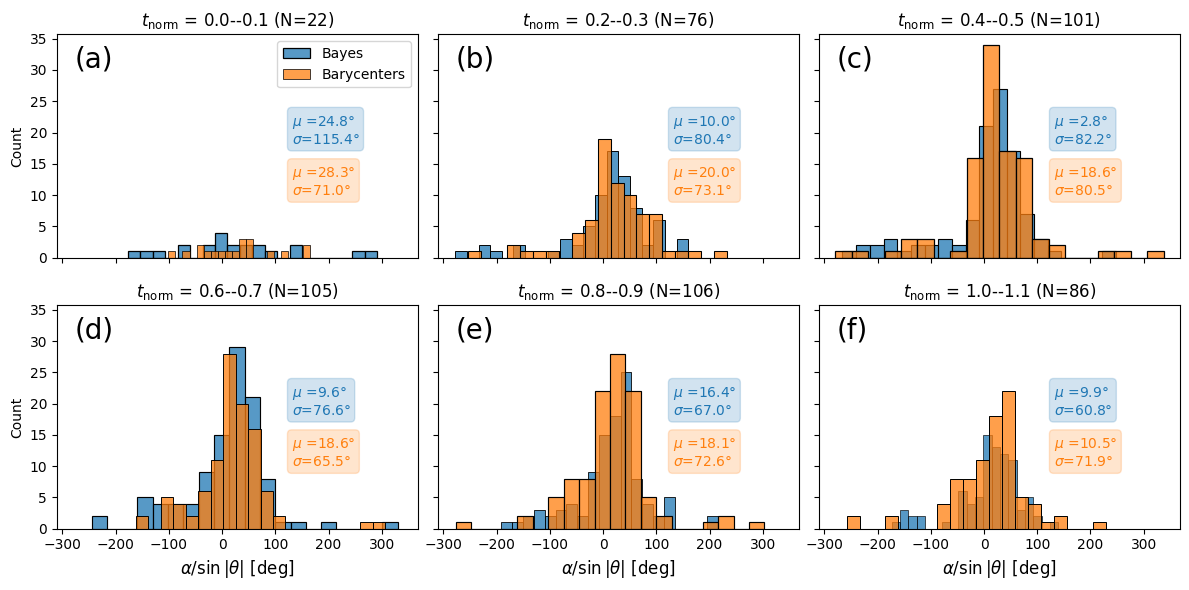

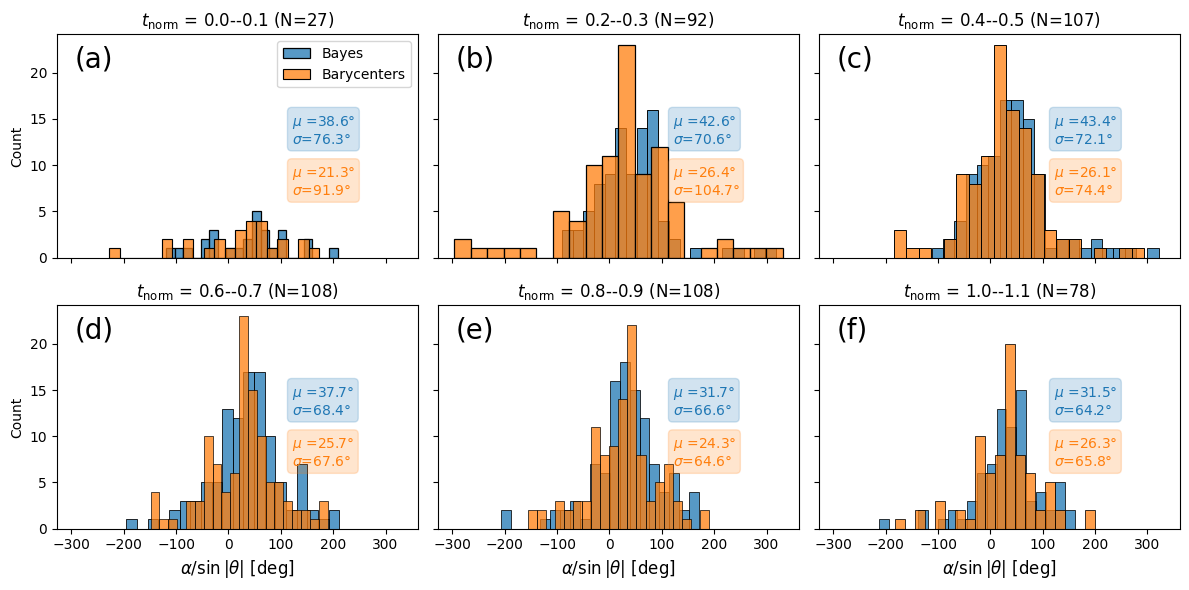

In [ ]:
db=DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index()

arslowf=db[db.flux <= db.flux.median()].AR.unique()
arshighf=db[db.flux > db.flux.median()].AR.unique()




for s,ars in enumerate([arslowf,arshighf]):

  limits=(-300,340)

  db=DFx2[DFx2['t_mean'].between(0.8,1.1)]

  db['lat']=np.abs(db['lat'])

  db1=DFx2[DFx2['t_mean'].between(0,1.1)].groupby(['AR','t_mean']).mean().reset_index()
  db1['lat']=np.abs(db1['lat'])
  db1=db1[db1['AR'].isin(ars)]
  db1=db1.assign(frac_sin= lambda x: x.alpha/np.sin(np.deg2rad(x.lat)))
  db1=db1.assign(fracb_sin= lambda x: x.alphab/np.sin(np.deg2rad(x.lat)))



  #sns.histplot(data=db1[db1['frac_sin'].between(*limits)],x='frac_sin')
  #sns.histplot(data=db1[db1['fracb_sin'].between(*limits)],x='fracb_sin')

  print(f'({db1.frac_sin.mean()-3*db1.frac_sin.std():.0f},{db1.frac_sin.mean()+3*db1.frac_sin.std():.0f})')
  print(f'({db1.fracb_sin.mean()-3*db1.fracb_sin.std():.0f},{db1.fracb_sin.mean()+3*db1.fracb_sin.std():.0f})')


  dbA=db1[db1['frac_sin'].between(*limits)]
  dbB=db1[db1['fracb_sin'].between(*limits)]


  f,ax=plt.subplots(2,3,figsize=(12,6),sharey=True,sharex=True)

  for (i,tt),ax1 in zip(enumerate(np.sort(dbA.t_mean.unique())[::2]),ax.flatten()):

    sns.histplot(data=dbA[dbA['t_mean'].between(tt,tt+0.1)],x='frac_sin',ax=ax1,bins=20,label='Bayes')
    sns.histplot(data=dbB[dbB['t_mean'].between(tt,tt+0.1)],x='fracb_sin',ax=ax1,bins=20,label='Barycenters')

    ax1.set_title(f'$t_\mathrm{{norm}}$ = {tt:.1f}--{tt+0.1:.1f} (N={len(dbA[dbA['t_mean'].between(tt,tt+0.1)].frac_sin.values)})')
    ax1.set_xlabel(r'$\alpha / \sin{|\theta|}$ [deg]',fontsize=12)

    ax1.text(
      0.65, 0.51,
      f'$\mu$ ={dbA[dbA['t_mean'].between(tt,tt+0.1)].frac_sin.mean():.1f}°\n$\sigma$={dbA[dbA['t_mean'].between(tt,tt+0.1)].frac_sin.std():.1f}°',
      color='tab:blue',
      transform=ax1.transAxes,
      fontsize=10,
      bbox=dict(boxstyle="round", alpha=0.2, color='tab:blue')
      )
    ax1.text(
      0.65, 0.28,
      f'$\mu$ ={dbB[dbB['t_mean'].between(tt,tt+0.1)].fracb_sin.mean():.1f}°\n$\sigma$={dbB[dbB['t_mean'].between(tt,tt+0.1)].fracb_sin.std():.1f}°',
      color='tab:orange',
      transform=ax1.transAxes,
      fontsize=10,
      bbox=dict(boxstyle="round", alpha=0.2, color='tab:orange')
      )

    ax1.text(0.05,0.85,f'({chr(97+i)})',transform=ax1.transAxes,fontsize=20)

  ax[0,0].legend()
  f.tight_layout()
  f.savefig(f'../figures/hist_sin_alpha_{'lowf' if s==0 else 'highf'}.pdf',dpi=300)
  f.show()




In [ ]:
ars[0]

np.int64(8084)

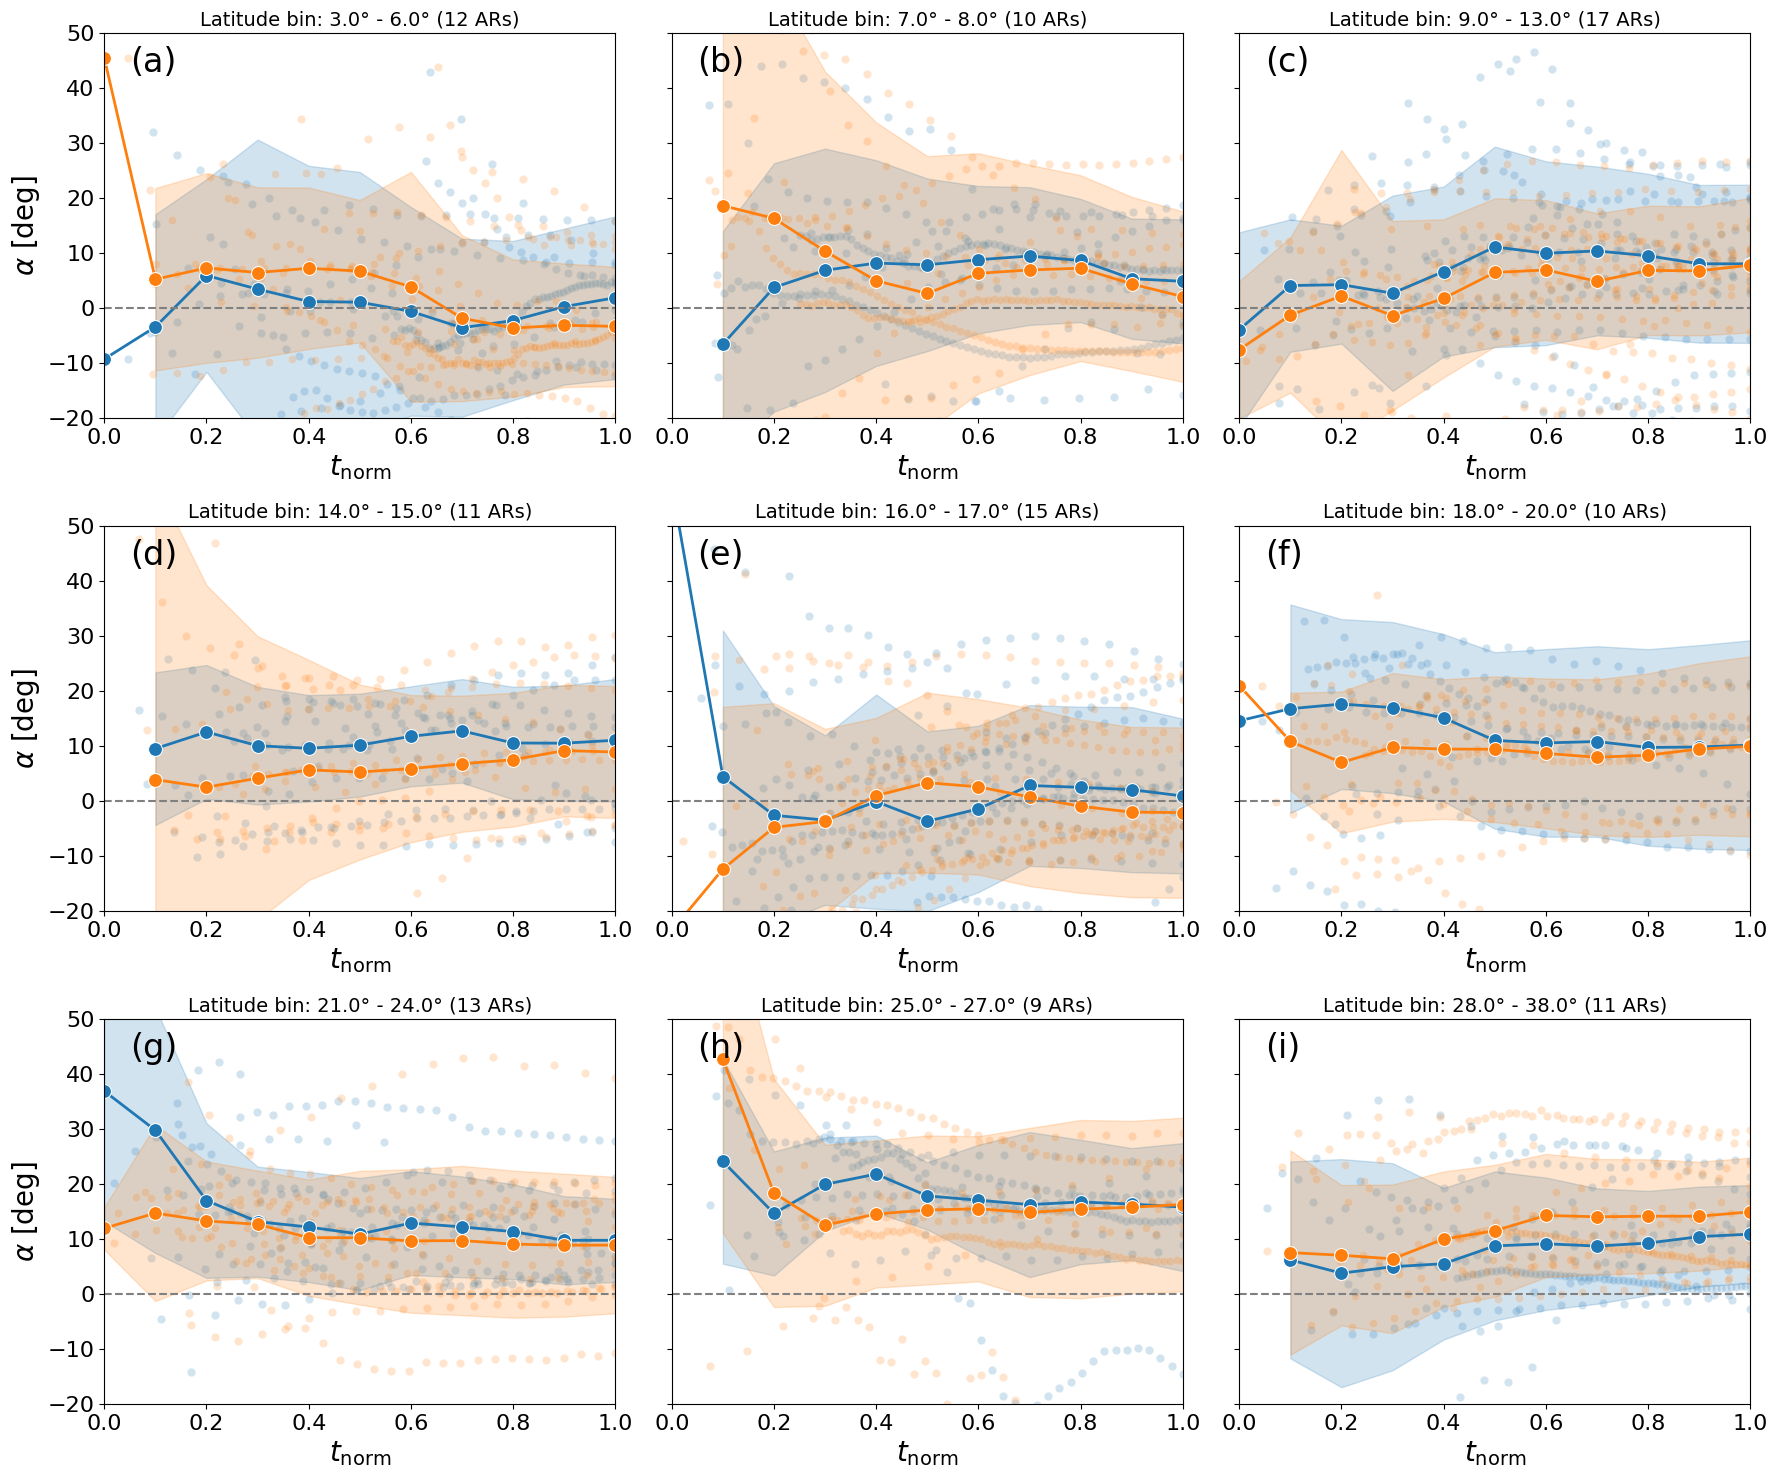

In [ ]:
'''
Plot of alpha vs normalized time for all ARs, separated by latitude bins.
Solid lines represent the median alpha at each normalized time for both modeled and barycenter methods.
scatter points represent individual data points. Solid dashed line at y=0 for reference.
Each panel shows a different latitude bin. Shaded area represents the standard deviation at each time.
'''


DFx2['lat']=np.abs(DFx2['lat'])

DFx2['lat_bin'] = pd.qcut(DFx2['lat'], q=9,labels=False)

f,ax=plt.subplots(3,3,figsize=(18,15),sharey=True)

for (i,lat_bin),ax1 in zip(enumerate(np.sort(DFx2.lat_bin.unique())),ax.flatten()):
    db1=DFx2[DFx2['lat_bin']==lat_bin]
    nARs=len(db1.AR.unique())

    binrange=db1.lat.min(),db1.lat.max()

    f1,ax1=plotting.plot_single(db1,'alpha',title='',ax=ax1,fig=f,scatter=True,estim='median',
                               error='band',err_kws={'alpha':1},color='tab:blue',ls='-')
    f1,ax1=plotting.plot_single(db1,'alphab',title='',ax=ax1,fig=f,color='tab:orange',scatter=True,
                               estim='median',
                               error='band',err_kws={'alpha':1},ls='-')
    ax1.set_ylabel(r'$\alpha$ [deg]',fontsize=20)
    ax1.set_xlabel(r'$t_\mathrm{norm}$',fontsize=20)
    ax1.tick_params(axis='both', which='major', labelsize=16)
    ax1.set_title(f'Latitude bin: {binrange[0]:.1f}° - {binrange[1]:.1f}° ({nARs} ARs)')
    ax1.legend().remove()
    ax1.set_xlim(0,1)
    ax1.set_ylim(-20,50)
    ax1.axhline(0,color='gray',ls='--')


for i,ax1 in enumerate(ax.flatten()):
    ax1.text(0.05,0.9,f'({chr(97+i)})',transform=ax1.transAxes,fontsize=24)

f.tight_layout()
f.savefig('../figures/alpha-vs-t_norm-by-lat.pdf',dpi=300)

/tmp/ipykernel_9601/3129853290.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['lat']=np.abs(db['lat'])
/tmp/ipykernel_9601/3129853290.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['t_bin'] = pd.qcut(db['t_norm'], q=4,labels=False)


------ Time bin: -0.10 - 0.40 ----
RSME alpha: 17.67 deg; rho: 0.139688
RSME alphab: 18.97 deg; rho: 0.192576
-----------------------------------------------
------ Time bin: 0.40 - 0.62 ----
RSME alpha: 14.93 deg; rho: 0.159774
RSME alphab: 14.75 deg; rho: 0.262050
-----------------------------------------------
------ Time bin: 0.62 - 0.83 ----
RSME alpha: 13.05 deg; rho: 0.220572
RSME alphab: 13.84 deg; rho: 0.265636
-----------------------------------------------
------ Time bin: 0.83 - 1.05 ----
RSME alpha: 12.72 deg; rho: 0.274182
RSME alphab: 13.10 deg; rho: 0.297061
-----------------------------------------------


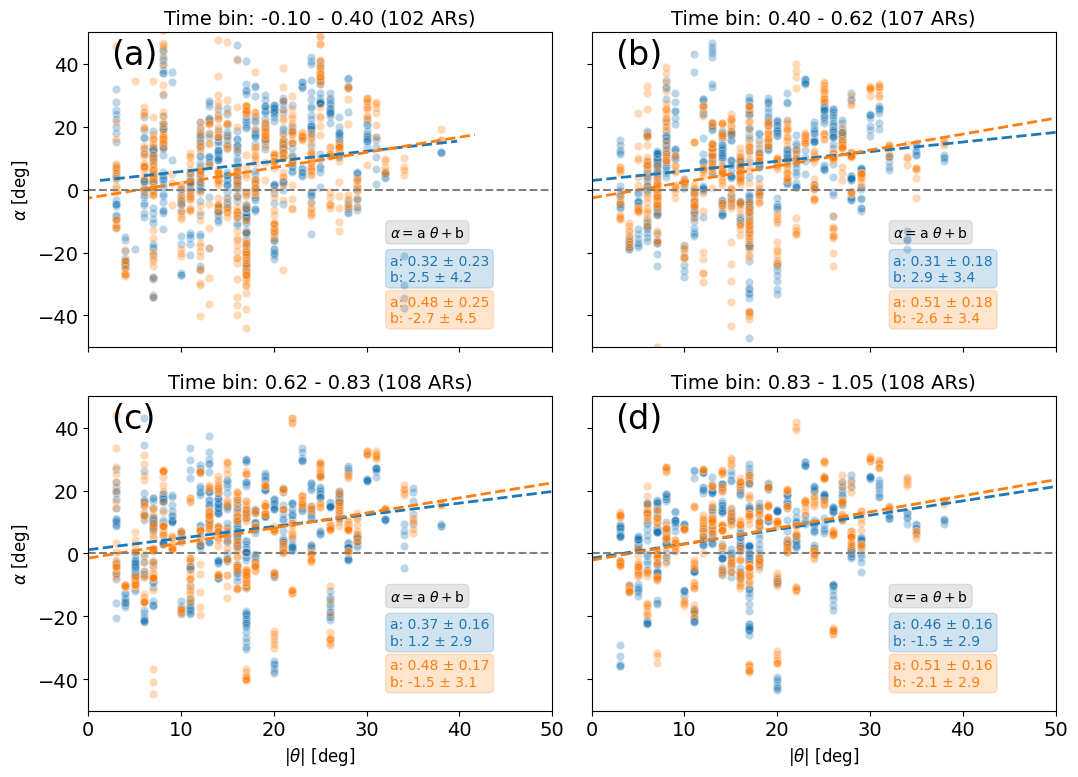

In [ ]:
'''
Plot of alpha vs latitude for all ARs, separated by normalized time bins.
Dashed lines represent linear fits for both modeled and barycenter methods.
scatter points represent individual data points. Solid dashed line at y=0 for reference.
Each panel shows a different normalized time bin.


'''






db=DFx2[DFx2.t_mean<=1]

db['lat']=np.abs(db['lat'])
db['t_bin'] = pd.qcut(db['t_norm'], q=4,labels=False)

f,ax=plt.subplots(2,2,figsize=(11,8),sharey=True,sharex=True)

for (i,t_bin),ax1 in zip(enumerate(np.sort(db.t_bin.unique())),ax.flatten()):
    db1=db[db['t_bin']==t_bin]
    nARs=len(db1.AR.unique())

    binrange=db1.t_norm.min(),db1.t_norm.max()

    sns.scatterplot(data=db1,x='lat',y='alpha',color='tab:blue',alpha=0.3,label=r'$\alpha_\mathrm{mod}$',ax=ax1)
    sns.scatterplot(data=db1,x='lat',y='alphab',color='tab:orange',alpha=0.3,label=r'$\alpha_\mathrm{bar}$',ax=ax1)
    db2=db1.groupby('AR').median().reset_index()
    #sns.scatterplot(data=db2,x='lat',y='alpha',color='tab:blue',s=100,edgecolor='black',label=r'Median $\alpha_\mathrm{mod}$',ax=ax1)
    #sns.scatterplot(data=db2,x='lat',y='alphab',color='tab:orange',s=100,edgecolor='black',label=r'Median $\alpha_\mathrm{bar}$',ax=ax1)
    print(f'------ Time bin: {binrange[0]:.2f} - {binrange[1]:.2f} ----')
    for var, color in zip(['alpha', 'alphab'], ['tab:blue', 'tab:orange']):
      dfv = db2[[var,'lat']]
      res = stats.linregress(dfv['lat'].values, dfv[var].values)
      x_vals = np.array(ax1.get_xlim())
      y_vals = res.intercept + res.slope * x_vals
      ax1.plot(x_vals, y_vals, color=color, linestyle='--', linewidth=2, label=f'Fit ${var}$')

      ax1.text(
          0.65, 0.21 if var == 'alpha' else 0.08,
          f"a: {res.slope:.2f} ± {res.stderr:.2f}\nb: {res.intercept:.1f} ± {res.intercept_stderr:.1f}",
          color=color,
          transform=ax1.transAxes,
          fontsize=10,
          bbox=dict(boxstyle="round", alpha=0.2, color=color)
      )
      rmse = ((db2[var] - (res.slope * db2['lat'] + res.intercept)) ** 2).mean() ** 0.5

      print(f'RSME {var}: {rmse:.2f} deg; rho: {res.rvalue:.6f}')

    print('-----------------------------------------------')

    ax1.text(
        0.65, 0.35 ,
        r"$\alpha = \mathrm{a}~\theta +\mathrm{b}$",
        color='black',
        transform=ax1.transAxes,
        fontsize=10,
        bbox=dict(boxstyle="round", alpha=0.2, color='gray')
        )

    ax1.set_ylabel(r'$\alpha$ [deg]')
    ax1.set_xlabel(r'$|\theta|$ [deg]')
    ax1.set_title(f'Time bin: {binrange[0]:.2f} - {binrange[1]:.2f} ({nARs} ARs)')
    ax1.legend().remove()
    ax1.set_xlim(0,50)
    ax1.set_ylim(-50,50)
    ax1.axhline(0,color='gray',ls='--')


for i,ax1 in enumerate(ax.flatten()):
    ax1.text(0.05,0.9,f'({chr(97+i)})',transform=ax1.transAxes,fontsize=24)

f.tight_layout()
f.savefig('../figures/alpha-vs-lat-by-tnorm.pdf',dpi=300)



/tmp/ipykernel_9601/28542831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['lat']=np.abs(db['lat'])
/tmp/ipykernel_9601/28542831.py:13: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  res = stats.linregress(dfv['lat'].values, dfv[var].values)


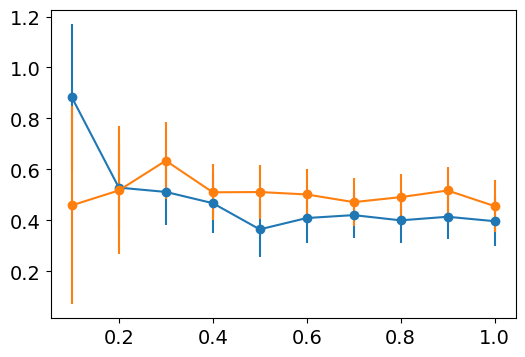

In [ ]:
db=DFx2[DFx2.t_mean<=1]
db['lat']=np.abs(db['lat'])


for var in ['alpha','alphab']:
    slp=[]
    slp_err=[]
    int=[]
    int_err=[]
    ax1=plt.gca()
    for tt in db.t_mean.unique():
        dfv=db[db.t_mean==tt]
        res = stats.linregress(dfv['lat'].values, dfv[var].values)
        slp.append(res.slope)
        slp_err.append(res.stderr)
        int.append(res.intercept)
        int_err.append(res.intercept_stderr)
    ax1.errorbar(db.t_mean.unique()[:-2],slp[:-2],slp_err[:-2],marker='o')



<ErrorbarContainer object of 3 artists>

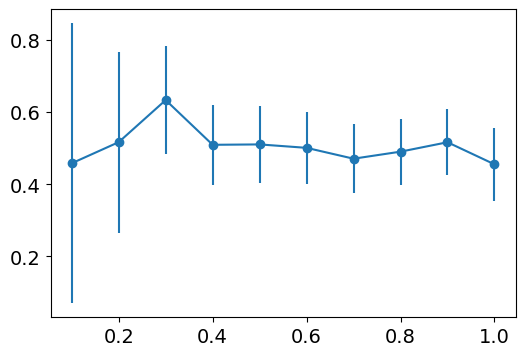

In [ ]:
plt.errorbar(db.t_mean.unique()[:-2],slp[:-2],slp_err[:-2],marker='o')

/tmp/ipykernel_9601/1060717700.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['lat']=np.abs(db['lat'])
/tmp/ipykernel_9601/1060717700.py:54: RuntimeWarning: divide by zero encountered in divide
  w = np.where(derr > 0, 1 / derr, 0)
/tmp/ipykernel_9601/1060717700.py:54: RuntimeWarning: divide by zero encountered in divide
  w = np.where(derr > 0, 1 / derr, 0)


------ Time bin: 0.01 - 0.27 ----
RSME alpha: 17.51 deg; rho: 0.144757
RSME alphab: 22.94 deg; rho: 0.172746
-----------------------------------------------
------ Time bin: 0.27 - 0.53 ----
RSME alpha: 16.04 deg; rho: 0.140677
RSME alphab: 16.01 deg; rho: 0.238898
-----------------------------------------------
------ Time bin: 0.53 - 0.79 ----
RSME alpha: 13.41 deg; rho: 0.194763
RSME alphab: 14.01 deg; rho: 0.255455
-----------------------------------------------
------ Time bin: 0.79 - 1.05 ----
RSME alpha: 12.71 deg; rho: 0.272250
RSME alphab: 13.13 deg; rho: 0.294739
-----------------------------------------------


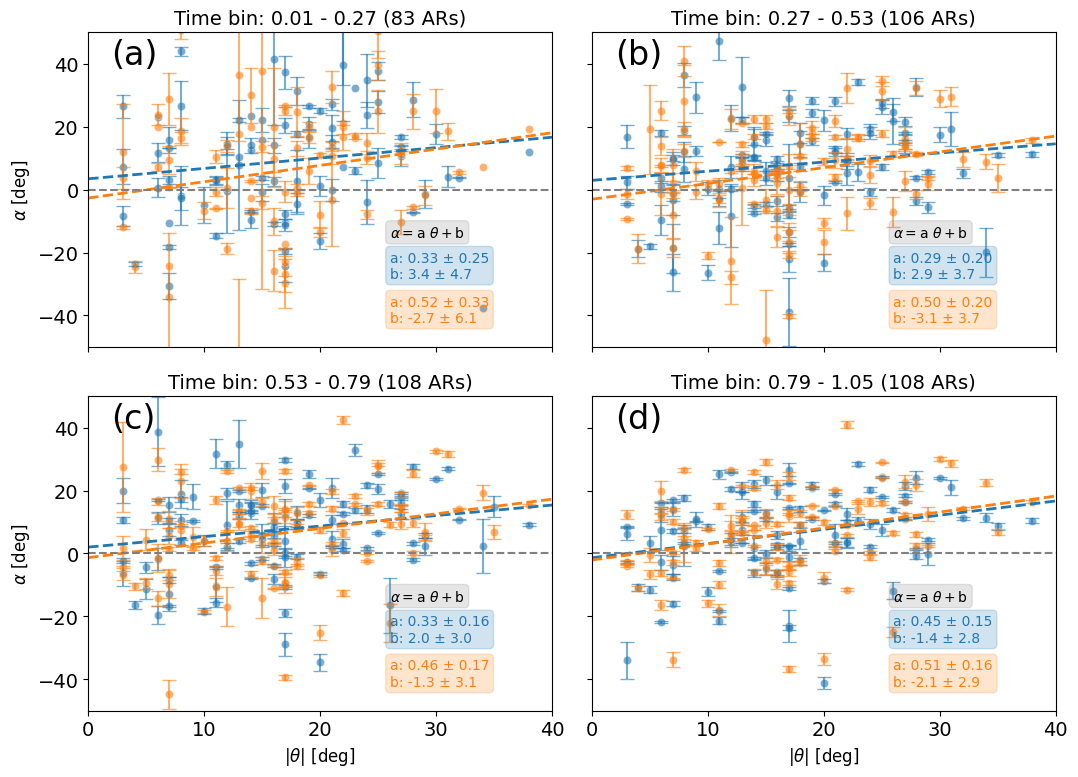

In [ ]:
'''
Plot of alpha vs latitude for all ARs, separated by normalized time bins.
Dashed lines represent linear fits for both modeled and barycenter methods.
scatter points represent individual data points. Solid dashed line at y=0 for reference.
Each panel shows a different normalized time bin.


'''

from sklearn.linear_model import LinearRegression




db=DFx2[DFx2.t_mean<=1]

db['lat']=np.abs(db['lat'])
db=db[db.t_norm>=0]
db['t_bin'] = pd.cut(db['t_norm'], bins=4,labels=False)

f,ax=plt.subplots(2,2,figsize=(11,8),sharey=True,sharex=True)

for (i,t_bin),ax1 in zip(enumerate(np.sort(db.t_bin.unique())),ax.flatten()):
    db1=db[db['t_bin']==t_bin]
    nARs=len(db1.AR.unique())
    db_std = db1.groupby('AR').std().reset_index()

    binrange=db1.t_norm.min(),db1.t_norm.max()
    db2=db1.groupby('AR').median().reset_index()
    sns.scatterplot(data=db2,x='lat',y='alpha',color='tab:blue',alpha=0.6,label=r'$\alpha_\mathrm{mod}$',ax=ax1)
    sns.scatterplot(data=db2,x='lat',y='alphab',color='tab:orange',alpha=0.6,label=r'$\alpha_\mathrm{bar}$',ax=ax1)
    ax1.errorbar(db2['lat'], db2['alpha'],
                 yerr=db1.groupby('AR').std().reset_index()['alpha'],
                 fmt='none', capsize=5, color='black',
                 barsabove=False,ecolor='tab:blue',alpha=0.6)
    ax1.errorbar(db2['lat'], db2['alphab'],
                 yerr=db1.groupby('AR').std().reset_index()['alphab'],
                 fmt='none', capsize=5, color='black',
                 barsabove=False,ecolor='tab:orange',alpha=0.6)


    #sns.scatterplot(data=db2,x='lat',y='alpha',color='tab:blue',s=100,edgecolor='black',label=r'Median $\alpha_\mathrm{mod}$',ax=ax1)
    #sns.scatterplot(data=db2,x='lat',y='alphab',color='tab:orange',s=100,edgecolor='black',label=r'Median $\alpha_\mathrm{bar}$',ax=ax1)
    print(f'------ Time bin: {binrange[0]:.2f} - {binrange[1]:.2f} ----')
    for var, color in zip(['alpha', 'alphab'], ['tab:blue', 'tab:orange']):

      dfv = db2[[var,'lat']]
      res = stats.linregress(dfv['lat'].values, dfv[var].values)
      derr = db1.groupby('AR')[var].quantile(0.75).values - db1.groupby('AR')[var].quantile(0.25).values
      derr = derr / 2
      #yerr = db1.groupby('AR')[var].std().reset_index()[var] / np.sqrt(db1.groupby('AR').size().values)

      # Evitar pesos infinitos o nulos
      w = np.where(derr > 0, 1 / derr, 0)
      x=dfv['lat'].values
      y=dfv[var].values
      #w=np.ones_like(x)
      # Ajuste lineal ponderado
      #coeffs, cov = np.polyfit(x, y, deg=1, w=w, cov=True)
      #slope, intercept = coeffs
      #slope_err, intercept_err = np.sqrt(np.diag(cov))
      #slope, intercept, slope_ci, intercept_ci = theil_sen_ci(x, y)

      x_vals = np.linspace(0, 40, 100)
      y_vals = res.slope * x_vals + res.intercept
      ax1.plot(x_vals, y_vals, color=color, linestyle='--', linewidth=2,
                 label=f'Weighted fit {var}')

      ax1.text(
            0.65, 0.22 if var == 'alpha' else 0.08,
            f"a: {res.slope:.2f} ± {res.stderr:.2f}\n"
            f"b: {res.intercept:.1f} ± {res.intercept_stderr:.1f}",
            color=color,
            transform=ax1.transAxes,
            fontsize=10,
            bbox=dict(boxstyle="round", alpha=0.2, color=color)
        )
      rmse = ((db2[var] - (res.slope * db2['lat'] + res.intercept)) ** 2).mean() ** 0.5

      print(f'RSME {var}: {rmse:.2f} deg; rho: {res.rvalue:.6f}')

    print('-----------------------------------------------')

    ax1.text(
        0.65, 0.35 ,
        r"$\alpha = \mathrm{a}~\theta +\mathrm{b}$",
        color='black',
        transform=ax1.transAxes,
        fontsize=10,
        bbox=dict(boxstyle="round", alpha=0.2, color='gray')
        )

    ax1.set_ylabel(r'$\alpha$ [deg]')
    ax1.set_xlabel(r'$|\theta|$ [deg]')
    ax1.set_title(f'Time bin: {binrange[0]:.2f} - {binrange[1]:.2f} ({nARs} ARs)')
    ax1.legend().remove()
    ax1.set_xlim(0,40)
    ax1.set_ylim(-50,50)
    ax1.axhline(0,color='gray',ls='--')


for i,ax1 in enumerate(ax.flatten()):
    ax1.text(0.05,0.9,f'({chr(97+i)})',transform=ax1.transAxes,fontsize=24)

f.tight_layout()
f.savefig('../figures/alpha-vs-lat-by-tnorm.pdf',dpi=300)



/tmp/ipykernel_9601/1053227913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['lat'] = np.abs(db['lat'])


------ Time bin: 0.01 - 0.27 ----
RMSE alpha: 17.50 deg
RMSE alphab: 22.94 deg
-----------------------------------------------
------ Time bin: 0.27 - 0.53 ----
RMSE alpha: 16.04 deg
RMSE alphab: 16.02 deg
-----------------------------------------------
------ Time bin: 0.53 - 0.79 ----
RMSE alpha: 13.41 deg
RMSE alphab: 14.02 deg
-----------------------------------------------
------ Time bin: 0.79 - 1.05 ----
RMSE alpha: 12.70 deg
RMSE alphab: 13.14 deg
-----------------------------------------------


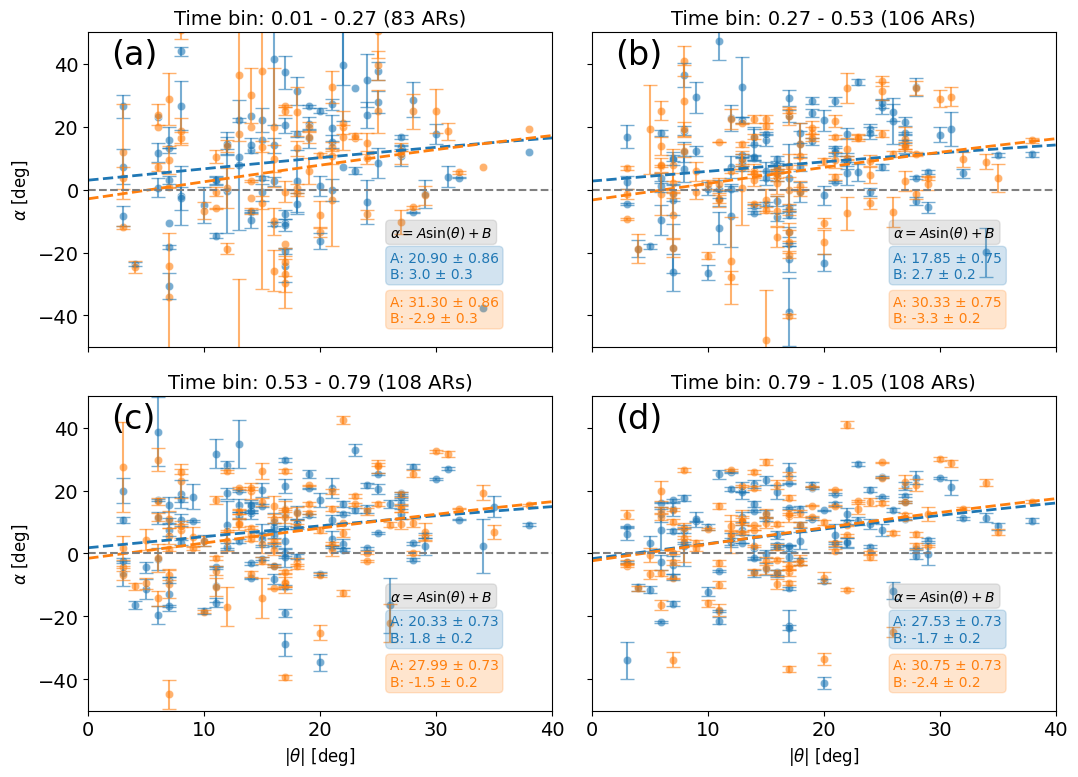

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def sin_func(x, A, B):
    """Modelo sinusoidal simple."""
    return A * np.sin(np.radians(x)) + B  # si x está en grados

db = DFx2[DFx2.t_mean <= 1]
db['lat'] = np.abs(db['lat'])
db = db[db.t_norm >= 0]
db['t_bin'] = pd.cut(db['t_norm'], bins=4, labels=False)

f, ax = plt.subplots(2, 2, figsize=(11, 8), sharey=True, sharex=True)

for (i, t_bin), ax1 in zip(enumerate(np.sort(db.t_bin.unique())), ax.flatten()):
    db1 = db[db['t_bin'] == t_bin]
    nARs = len(db1.AR.unique())
    binrange = db1.t_norm.min(), db1.t_norm.max()
    db2 = db1.groupby('AR').median().reset_index()

    sns.scatterplot(data=db2, x='lat', y='alpha', color='tab:blue', alpha=0.6, label=r'$\alpha_\mathrm{mod}$', ax=ax1)
    sns.scatterplot(data=db2, x='lat', y='alphab', color='tab:orange', alpha=0.6, label=r'$\alpha_\mathrm{bar}$', ax=ax1)

    # Dibujar barras de error
    for var, color in zip(['alpha', 'alphab'], ['tab:blue', 'tab:orange']):
        err = db1.groupby('AR')[var].std().reset_index()[var]
        ax1.errorbar(db2['lat'], db2[var], yerr=err, fmt='none', capsize=5, ecolor=color, alpha=0.6)

    print(f'------ Time bin: {binrange[0]:.2f} - {binrange[1]:.2f} ----')

    for var, color in zip(['alpha', 'alphab'], ['tab:blue', 'tab:orange']):
        x = db2['lat'].values
        y = db2[var].values

        # Definir pesos (inverso del rango intercuartílico)
        derr = db1.groupby('AR')[var].quantile(0.75).values - db1.groupby('AR')[var].quantile(0.25).values
        derr = np.where(derr == 0, np.nanmedian(derr), derr)
        w = 1 / derr

        # Ajuste sinusoidal con pesos
        try:
            popt, pcov = curve_fit(sin_func, x, y, sigma=1, absolute_sigma=True, p0=[10, 0])
            A, B = popt
            A_err, B_err = np.sqrt(np.diag(pcov))
        except Exception as e:
            print(f"Fit failed for {var}: {e}")
            A, B, A_err, B_err = np.nan, np.nan, np.nan, np.nan

        # Graficar curva ajustada
        x_fit = np.linspace(0, 40, 200)
        y_fit = sin_func(x_fit, A, B)
        ax1.plot(x_fit, y_fit, color=color, linestyle='--', linewidth=2, label=f'Sine fit {var}')

        # Mostrar parámetros
        ax1.text(
            0.65, 0.22 if var == 'alpha' else 0.08,
            f"A: {A:.2f} ± {A_err:.2f}\nB: {B:.1f} ± {B_err:.1f}",
            color=color,
            transform=ax1.transAxes,
            fontsize=10,
            bbox=dict(boxstyle="round", alpha=0.2, color=color)
        )

        # Calcular RMSE
        rmse = np.sqrt(np.mean((y - sin_func(x, A, B)) ** 2))
        print(f'RMSE {var}: {rmse:.2f} deg')

    print('-----------------------------------------------')

    ax1.text(
        0.65, 0.35,
        r"$\alpha = A \sin(\theta) + B$",
        color='black',
        transform=ax1.transAxes,
        fontsize=10,
        bbox=dict(boxstyle="round", alpha=0.2, color='gray')
    )

    ax1.set_ylabel(r'$\alpha$ [deg]')
    ax1.set_xlabel(r'$|\theta|$ [deg]')
    ax1.set_title(f'Time bin: {binrange[0]:.2f} - {binrange[1]:.2f} ({nARs} ARs)')
    ax1.legend().remove()
    ax1.set_xlim(0, 40)
    ax1.set_ylim(-50, 50)
    ax1.axhline(0, color='gray', ls='--')

for i, ax1 in enumerate(ax.flatten()):
    ax1.text(0.05, 0.9, f'({chr(97+i)})', transform=ax1.transAxes, fontsize=24)

f.tight_layout()
f.savefig('../figures/alpha-vs-lat-sinefit.pdf', dpi=300)


In [ ]:
plt.plot(yerr)

NameError: name 'yerr' is not defined

/tmp/ipykernel_183968/2561337339.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['lat']=np.abs(db['lat'])


------ Low Flux ----
RSME alpha: 11.68 deg; rho: 0.391216
RSME alphab: 11.55 deg; rho: 0.409670
-----------------------------------------------
------ High Flux ----
RSME alpha: 13.48 deg; rho: 0.131941
RSME alphab: 14.59 deg; rho: 0.161803
-----------------------------------------------


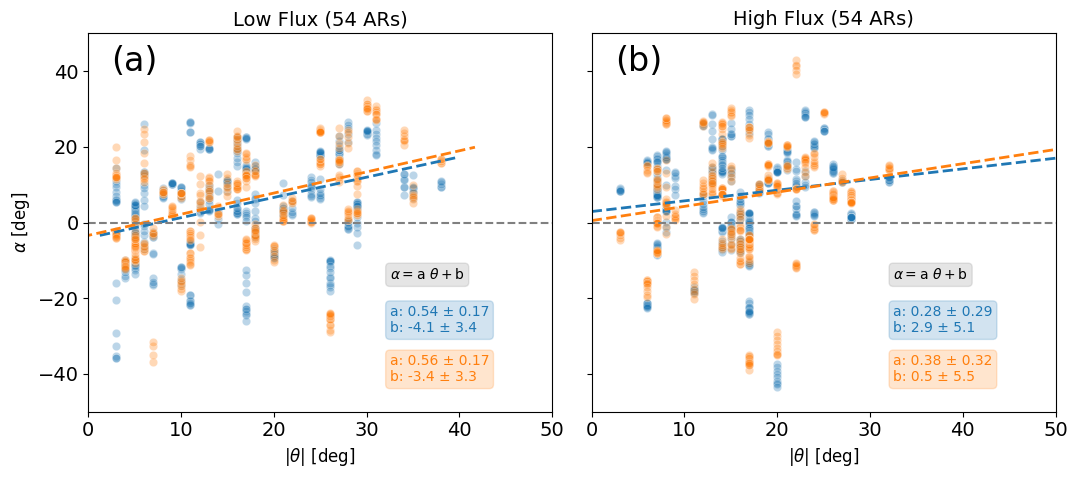

In [ ]:





db=DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index()

arslowf=db[db.flux <= db.flux.median()].AR.unique()
arshighf=db[db.flux > db.flux.median()].AR.unique()




db=DFx2[DFx2['t_mean'].between(0.8,1)]

db['lat']=np.abs(db['lat'])


f,ax=plt.subplots(1,2,figsize=(11,5),sharey=True,sharex=True)

for db1,ax1,titles in zip([db[db.AR.isin(arslowf)],db[db.AR.isin(arshighf)]],ax,['Low Flux','High Flux']):

    nARs=len(db1.AR.unique())
    sns.scatterplot(data=db1,x='lat',y='alpha',color='tab:blue',alpha=0.3,label=r'$\alpha_\mathrm{mod}$',ax=ax1)
    sns.scatterplot(data=db1,x='lat',y='alphab',color='tab:orange',alpha=0.3,label=r'$\alpha_\mathrm{bar}$',ax=ax1)
    db2=db1.groupby('AR').median().reset_index()
    #sns.scatterplot(data=db2,x='lat',y='alpha',color='tab:blue',s=100,edgecolor='black',label=r'Median $\alpha_\mathrm{mod}$',ax=ax1)
    #sns.scatterplot(data=db2,x='lat',y='alphab',color='tab:orange',s=100,edgecolor='black',label=r'Median $\alpha_\mathrm{bar}$',ax=ax1)
    print(f'------ {titles} ----')
    for var, color in zip(['alpha', 'alphab'], ['tab:blue', 'tab:orange']):
      dfv = db2[[var,'lat']]
      rho=db2[var].corr(db2['lat'])
      res = stats.linregress(dfv['lat'].values, dfv[var].values)
      x_vals = np.array(ax1.get_xlim())
      y_vals = res.intercept + res.slope * x_vals
      ax1.plot(x_vals, y_vals, color=color, linestyle='--', linewidth=2, label=f'Fit ${var}$')

      ax1.text(
          0.65, 0.21 if var == 'alpha' else 0.08,
          f"a: {res.slope:.2f} ± {res.stderr:.2f}\nb: {res.intercept:.1f} ± {res.intercept_stderr:.1f}",
          color=color,
          transform=ax1.transAxes,
          fontsize=10,
          bbox=dict(boxstyle="round", alpha=0.2, color=color)
      )
      rmse = ((db2[var] - (res.slope * db2['lat'] + res.intercept)) ** 2).mean() ** 0.5

      print(f'RSME {var}: {rmse:.2f} deg; rho: {res.rvalue:.6f}')
    print('-----------------------------------------------')


    ax1.text(
        0.65, 0.35 ,
        r"$\alpha = \mathrm{a}~\theta +\mathrm{b}$",
        color='black',
        transform=ax1.transAxes,
        fontsize=10,
        bbox=dict(boxstyle="round", alpha=0.2, color='gray')
        )

    ax1.set_ylabel(r'$\alpha$ [deg]')
    ax1.set_xlabel(r'$|\theta|$ [deg]')
    ax1.set_title(f'{titles} ({nARs} ARs)')
    ax1.legend().remove()
    ax1.set_xlim(0,50)
    ax1.set_ylim(-50,50)
    ax1.axhline(0,color='gray',ls='--')


for i,ax1 in enumerate(ax.flatten()):
    ax1.text(0.05,0.9,f'({chr(97+i)})',transform=ax1.transAxes,fontsize=24)

f.tight_layout()
f.savefig('../figures/alpha-vs-lat-by-flux.pdf',dpi=300)

# Bayes approach to Joy Law

In [ ]:
# PyMC 4.0 imports
import pymc as pm
import pytensor
import arviz as az


WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


In [ ]:
db = DFx2[DFx2.t_mean <= 1]
db['lat'] = np.abs(db['lat'])
db = db[db.t_mean > 0]


db2=db.groupby(['AR','t_mean']).mean().reset_index()

/tmp/ipykernel_9601/1551898832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['lat'] = np.abs(db['lat'])


In [ ]:
np.arange(0.1,1.1,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
db0.t_mean.unique()

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
ars0=db2[db2.t_mean==0.1].AR.unique()
db0=db2[db2.AR.isin(ars0)]
alpha=[db0[db0.t_mean == tt].alpha.values for tt in db0.t_mean.unique()]
alphab=[db0[db0.t_mean == tt].alphab.values for tt in db0.t_mean.unique()]
theta=[db0[db0.t_mean == tt].lat.values for tt in db0.t_mean.unique()]

In [ ]:
alpha

[array([ 15.24363537,  -6.46755991,  -6.61873692,  54.03637341,
         -4.58900961, -18.14485556,  24.11983269,  54.60024025,
         30.97995389,  32.73651533,  13.5042958 ,   3.06728899,
         25.81571533,   0.69392889,  -5.63197003, -25.72812412,
          4.09255724,  40.71300062,  16.80730227, -10.01357326,
         18.87649785,  -6.57414233,  -3.43375404,   6.63548195,
         29.80902359,   0.57734486,  29.95498182, -12.91386119,
         22.85726864,  15.49940919,  18.92275549, -14.62023103,
         12.4264637 , -23.02762694,   4.22340478,  -4.36263857,
         16.57260363,  43.74288193,  16.01380695, -18.18224483,
         -6.36828368,  34.70191036,  34.75814413]),
 array([  5.91846765,  -1.41853569,  -8.32661597,  23.55484272,
          0.98783407, -19.65145075,  25.07799141,  17.01203615,
         24.24367719,  28.66591897,  10.48544252,   4.37170106,
         22.2422158 ,   9.19514758,  -9.96676778, -18.79220761,
          2.52383949,  37.64249007,  18.19135887,   

In [ ]:
for x in alpha:
    print(len(x))

43
43
43
43
43
43
43
43
43
43


In [ ]:
#ppc0,ttr0=JOYMODEL2(np.array(alpha).T,np.array(theta).T)
ppcb0,ttrb0=JOYMODEL2(np.array(alphab).T,np.array(theta).T)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1274 seconds.
Sampling: [alpha_obs]


Output()

In [ ]:
np.shape(ttr0.posterior.sigma.values[:].mean(axis=(0,1)))

(10,)

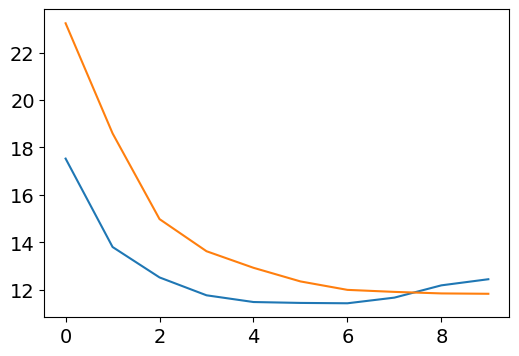

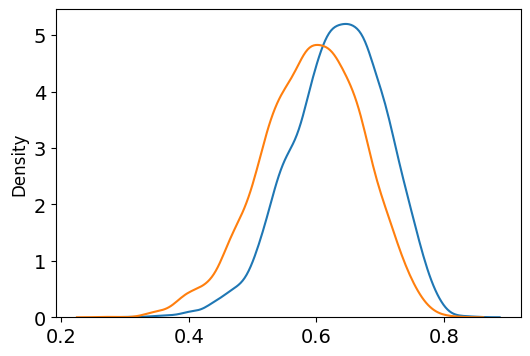

<Axes: ylabel='Density'>

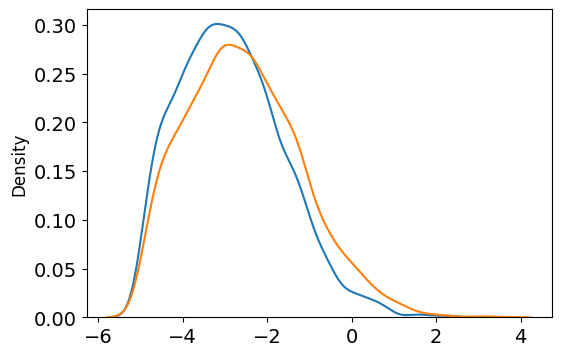

In [ ]:
plt.plot(ttr0.posterior.sigma.values[:].mean(axis=(0,1)))
plt.plot(ttrb0.posterior.sigma.values[:].mean(axis=(0,1)))

plt.show()

sns.kdeplot(np.ravel(ttr0.posterior.a.values))
sns.kdeplot(np.ravel(ttrb0.posterior.a.values))

plt.show()

sns.kdeplot(np.ravel(ttr0.posterior.b.values))
sns.kdeplot(np.ravel(ttrb0.posterior.b.values))


<Axes: xlabel='alpha_obs'>

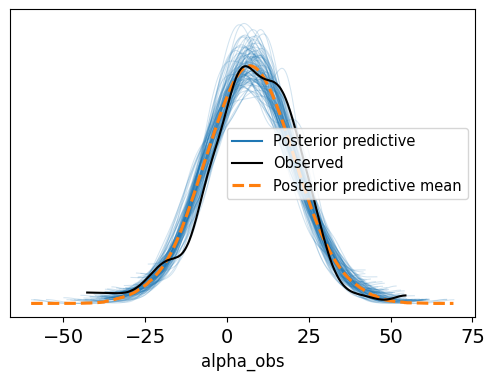

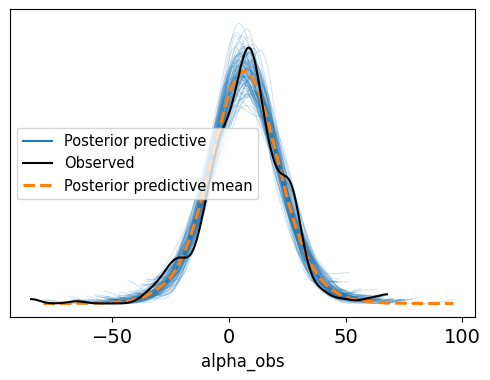

In [ ]:
az.plot_ppc(ppc0, num_pp_samples=100)
az.plot_ppc(ppcb0, num_pp_samples=100)

In [ ]:
def JOYMODEL(alpha,theta):

    # Model
    with pm.Model() as joy_model:
        a = pm.Uniform('a', 0, 1)
        b = pm.Uniform('b', -5, 5)
        sigma = pm.HalfNormal('sigma', 5)

        mu = a * theta + b
        alpha_obs = pm.Normal('alpha_obs', mu, sigma, observed=alpha)

        trace = pm.sample()
        ppc = pm.sample_posterior_predictive(trace)

    # Posterior predictive check
    #az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=joy_model))

    return ppc,trace


def JOYMODEL2(alpha,theta):

    # Model
    with pm.Model() as joy_model:
        a = pm.Uniform('a', 0, 1)
        b = pm.Uniform('b', -5, 5)
        sigma = pm.HalfNormal('sigma', 5,shape=10)

        mu = a * theta + b
        alpha_obs = pm.Normal('alpha_obs', mu, sigma, observed=alpha)

        trace = pm.sample()
        ppc = pm.sample_posterior_predictive(trace)

    # Posterior predictive check
    #az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=joy_model))

    return ppc,trace

In [ ]:
db = DFx2[DFx2.t_mean <= 1]
db['lat'] = np.abs(db['lat'])
db = db[db.t_norm >= 0]
db['t_bin'] = pd.cut(db['t_norm'], bins=4, labels=False)



db1=db[db['t_bin']==3]

db2=db1.groupby(['AR']).mean().reset_index()

x=db2['lat'].values
y=db2['alpha'].values
yb=db2['alphab'].values
err=db_std['alpha'].values
errb=db_std['alphab'].values

ppc,ttr= JOYMODEL(x,y)
ppc2,ttr2= JOYMODEL(x,yb)


#trace=MODELJOY(x,y,err=err)
#traceb=MODELJOY(x,yb,err=errb)

#trace2=MODELJOY2(x,y,err=err)
#traceb2=MODELJOY2(x,yb,err=errb)


/tmp/ipykernel_9601/755033933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['lat'] = np.abs(db['lat'])
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 81 seconds.
Sampling: [alpha_obs]


Output()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, sigma]


Output()

/data/Work/plot-tilt-stats/.venv/lib/python3.12/site-packages/pymc/step_methods/hmc/quadpotential.py:316: RuntimeWarning: overflow encountered in dot
  return 0.5 * np.dot(x, v_out)


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 146 seconds.
Sampling: [alpha_obs]


Output()

<Axes: ylabel='Count'>

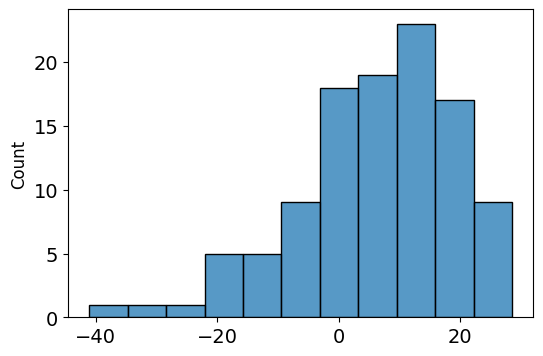

In [ ]:
sns.histplot(y)

<Axes: ylabel='Density'>

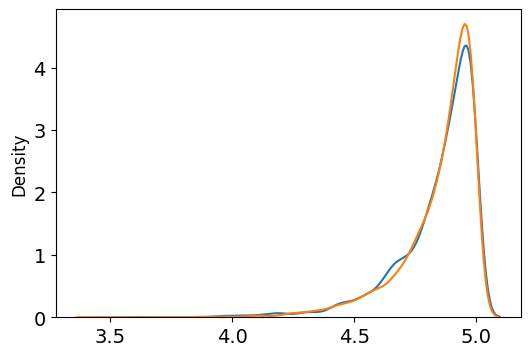

In [ ]:
sns.kdeplot(np.ravel(ttr.posterior.b.values))
sns.kdeplot(np.ravel(ttr2.posterior.b.values))


In [ ]:
az.summary(ttr)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a       0.480  0.083   0.322    0.629      0.001    0.001    3650.0    2446.0   
b       4.840  0.165   4.541    5.000      0.003    0.004    2138.0    1368.0   
sigma  12.224  0.813  10.771   13.802      0.013    0.013    3978.0    2731.0   

       r_hat  
a        1.0  
b        1.0  
sigma    1.0

<Axes: xlabel='alpha_obs'>

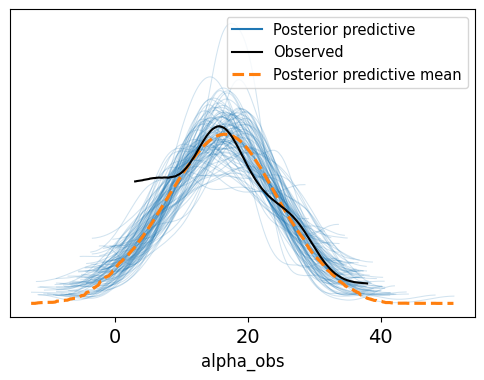

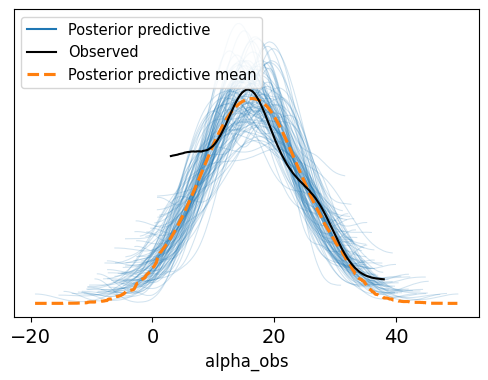

In [ ]:
az.plot_ppc(ppc, num_pp_samples=100)
az.plot_ppc(ppc2, num_pp_samples=100)

<Axes: xlabel='alpha_obs'>

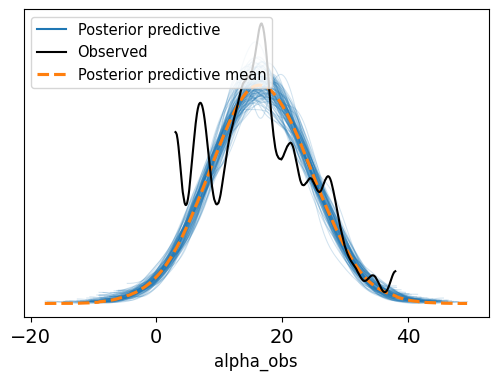

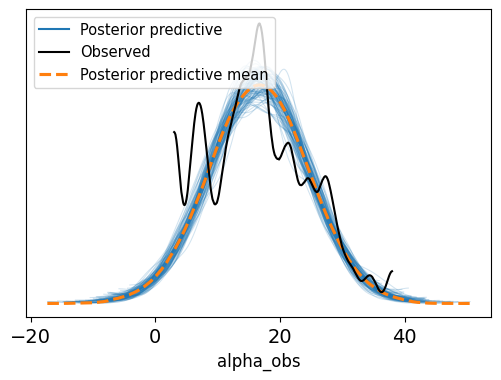

In [ ]:
az.plot_ppc(ppc, num_pp_samples=100)
az.plot_ppc(ppc2, num_pp_samples=100)


In [ ]:
with model:
    pm.sample_posterior_predictive(trace, extend_inferencedata=True)

In [ ]:
pm.sample_posterior_predictive(trace, extend_inferencedata=True)

TypeError: No model on context stack.

In [ ]:
az.plot_ppc(trace, num_pp_samples=100)

TypeError: `data` argument must have the group "posterior_predictive" for ppcplot

In [ ]:
df_comp_loo = az.compare({"hierarchical": trace, "pooled": traceb})

/data/Work/plot-tilt-stats/.venv/lib/python3.12/site-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/data/Work/plot-tilt-stats/.venv/lib/python3.12/site-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/data/Work/plot-tilt-stats/.venv/lib/pytho

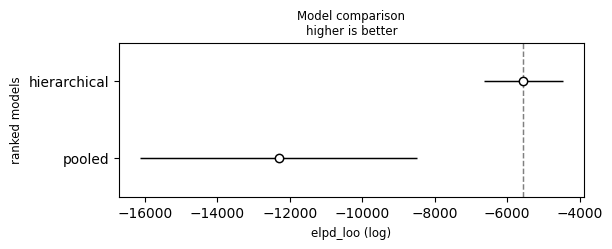

In [ ]:
az.plot_compare(df_comp_loo, insample_dev=False);

In [ ]:
traceb=MODELJOY(x,yb,err=errb)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 146 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


In [ ]:
db = DFx2[DFx2.t_mean <= 1]
db['lat'] = np.abs(db['lat'])
db = db[db.t_norm >= 0]
db['t_bin'] = pd.cut(db['t_norm'], bins=4, labels=False)
db1=db[db['t_bin']==1]

db2=db1.groupby('AR').median().reset_index()
db_std=db1.groupby('AR').std().reset_index()
x=db2['lat'].values
y=db2['alpha'].values
yb=db2['alphab'].values
err=db_std['alpha'].values
errb=db_std['alphab'].values
err

/tmp/ipykernel_343005/2340276736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['lat'] = np.abs(db['lat'])


array([ 6.00422155,  2.11605431, 10.79018692, 10.70482709,  0.79019379,
        1.41436156,  1.34090855,  5.40714839,  0.66461606,  0.74073756,
        0.34099892,  1.21159598,  1.88447992,  0.42881369,  0.48342694,
        1.15810132,  1.58535265,  4.08498717,  3.28297123,  7.27872613,
        2.50907139,  1.88201134,  3.04456489,  2.69708966,  1.31372489,
        3.10389796,  1.25891112,  2.85353576,  9.45250417,  1.19521741,
        5.27058272,  0.77933556,  2.62456578,  7.86399555,  2.80079221,
        1.89827109,  0.53776913,  0.92046406,  1.46761721,  0.92238139,
        2.57881717,  0.97502057,  0.52567796,  1.56255714,  2.29171326,
        2.43956832,  2.1993802 ,  1.09534948,  4.87176555,  2.04318661,
        1.10247158,  3.15765089,  2.38598224,  0.50631697,  0.60009442,
        0.43876117,  0.99543071,  1.77336042,  1.56966242,  3.8023004 ,
        4.1316699 ,  1.53679426,  2.73957559,  4.15961685,  1.91870799,
        3.17587513,  3.718022  , 10.11397569,  0.91394118,  2.98

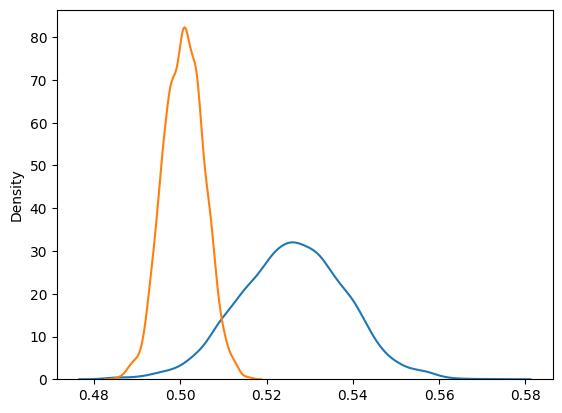

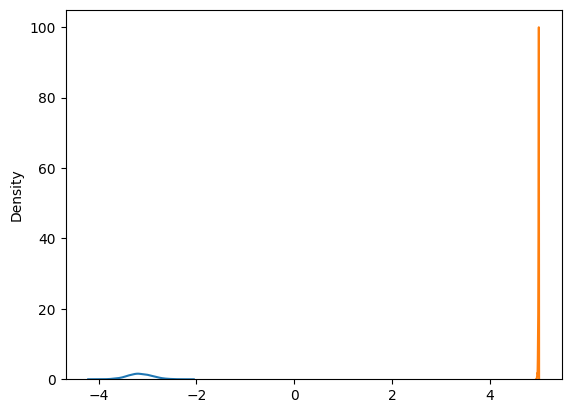

In [ ]:
sns.kdeplot(np.ravel(trace.posterior.a.values),common_norm=True)
sns.kdeplot(np.ravel(traceb.posterior.a.values),common_norm=True)

plt.show()
sns.kdeplot(np.ravel(trace.posterior.b.values))
sns.kdeplot(np.ravel(traceb.posterior.b.values))

plt.show()

# Discarded plots

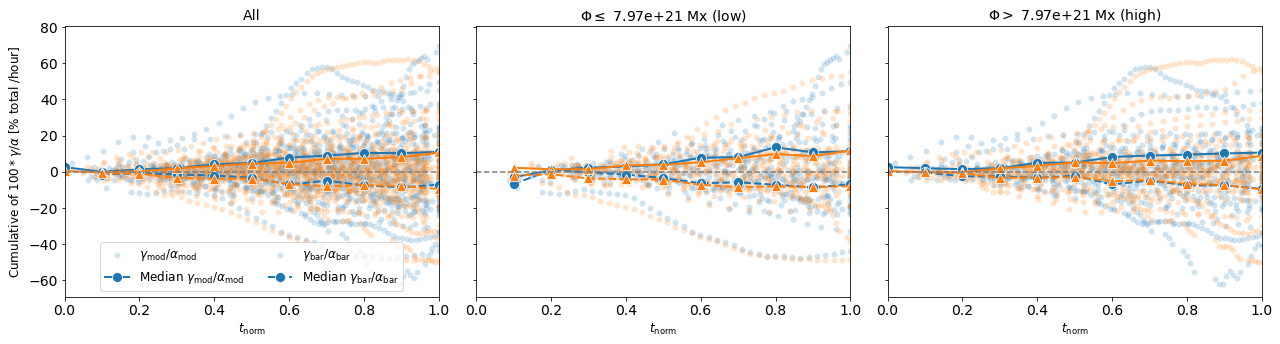

In [ ]:
import numpy as np

db=DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index()

dfa=pd.merge(db,DFx2,on='AR',suffixes=('_max',''))

dfa['frac_rot'] = dfa['rot']/dfa['alpha_max']*100
dfa['frac_rotb'] = dfa['rotb']/dfa['alphab_max']*100

# Crear máscaras para valores entre -5 y 5
mask_rot = (dfa['frac_rot'].between(-5, 5))
mask_rotb = (dfa['frac_rotb'].between(-5, 5))

# Aplicar las máscaras y reemplazar valores fuera del rango con NaN
dfa.loc[~mask_rot, 'frac_rot'] = np.nan
dfa.loc[~mask_rotb, 'frac_rotb'] = np.nan

# Alternativamente, si quieres mantener solo las filas que cumplen ambas condiciones:
dfa = dfa[mask_rot & mask_rotb]

dfa['frac_rot']=dfa.groupby('AR').frac_rot.cumsum()
dfa['frac_rotb']=dfa.groupby('AR').frac_rotb.cumsum()

f,ax=plt.subplots(1,3,figsize=(18,5),sharey=True)

arslowf=db[db.flux <= db.flux.median()].AR.unique()
arshighf=db[db.flux > db.flux.median()].AR.unique()


for db1,ax1,title in zip([dfa,dfa[dfa.AR.isin(arslowf)],dfa[dfa.AR.isin(arshighf)]],ax,
                        ['All',rf'$\Phi \leq $ {db.flux.median():.2e} Mx (low)',rf'$\Phi > $ {db.flux.median():.2e} Mx (high)']):

    dfm=db1.groupby('AR').mean().reset_index()

    arsp=dfm[dfm.frac_rot>0].AR.values
    arsn=dfm[dfm.frac_rot<0].AR.values

    # plot rot_cum in blue with circle marker and solid line
    f1,ax1=plotting.plot_single(db1[db1.AR.isin(arsp)],'frac_rot',title='',marker='o',
                            color='tab:blue',error=None,estim='median',
                            err_kws={'alpha':1},ax=ax1,fig=f,scatter=True)


    # plot rot_cum in blue with circle marker and solid line
    f1,ax1=plotting.plot_single(db1[db1.AR.isin(arsn)].reset_index(),'frac_rot',title='',marker='o'
                            ,color='tab:blue',error=None,estim='median',
                            err_kws={'alpha':1},ax=ax1,fig=f,scatter=True,ls='--')

    arsp=dfm[dfm.frac_rotb>0].AR.values
    arsn=dfm[dfm.frac_rotb<0].AR.values

    # plot rotb_cum in orange with triangle marker and dashed line
    f1,ax1=plotting.plot_single(db1[db1.AR.isin(arsp)],'frac_rotb',title='',
                            ax=ax1,fig=f,marker='^',color='tab:orange',estim='median'
                            ,error=None,err_kws={'alpha':1},scatter=True)



    f1,ax1=plotting.plot_single(db1[db1.AR.isin(arsn)],'frac_rotb',title='',
                            ax=ax1,fig=f,marker='^',color='tab:orange',estim='median',
                            error=None,err_kws={'alpha':1},scatter=True,ls='--')

    ax1.legend().remove()
    ax1.set_ylabel(r'Cumulative of $100*\gamma/\alpha$ [% total /hour]')
    ax1.set_xlabel(r'$t_\mathrm{norm}$')
    ax1.set_xlim(0,1)
    #ax1.set_ylim(-20,20)
    ax1.axhline(0,color='gray',ls='--')
    ax1.set_title(title)

h,l=ax[0].get_legend_handles_labels()
ax[0].legend(ncols=2,fontsize=12,handles=h,
             labels=[r'$\gamma_\mathrm{mod}/\alpha_\mathrm{mod}$',
                     r'Median $\gamma_\mathrm{mod}/\alpha_\mathrm{mod}$',
                     r'$\gamma_\mathrm{bar}/\alpha_\mathrm{bar}$',
                     r'Median $\gamma_\mathrm{bar}/\alpha_\mathrm{bar}$'],
             loc='lower center')
f.tight_layout()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


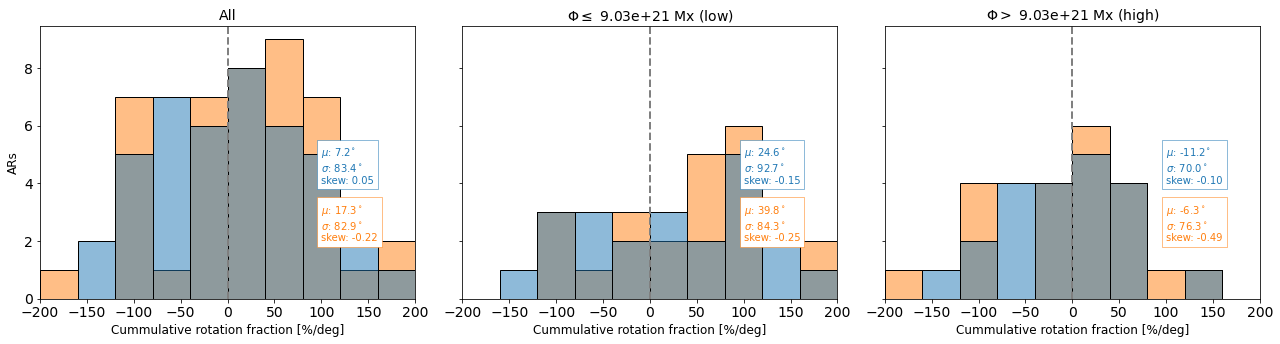

In [ ]:
'''
Este plot muestra histogramas de la fracción acumulativa de rotación (gamma/alpha)
en función del momento del flujo magnético total de las regiones activas (ARs).
Se divide en tres subplots: todos los ARs, ARs con flujo bajo y ARs con flujo alto.
Se calculan estadísticas como la media, desviación estándar y sesgo
para cada grupo y se muestran en el gráfico. Los valores extremos fuera del rango
de -200 a 200 se excluyen para una mejor visualización, ya que estos provienen de ARs
con valores muy pequeños de tilt al final de la emergencia que generan fracciones muy grandes.

'''

f,ax=plt.subplots(1,3,figsize=(18,5),sharey=True)



db=DFx2[DFx2.t_mean==1].groupby('AR').mean().reset_index()

db['frac_rot'] = 100*db['rot_cum']/db['alpha']
db['frac_rotb'] = 100*db['rotb_cum']/db['alphab']

# Crear máscaras para valores entre -5 y 5
mask_rot = (db['frac_rot'].between(-200, 200))
mask_rotb = (db['frac_rotb'].between(-200, 200))

# Aplicar las máscaras y reemplazar valores fuera del rango con NaN
db.loc[~mask_rot, 'frac_rot'] = np.nan
db.loc[~mask_rotb, 'frac_rotb'] = np.nan

# Alternativamente, si quieres mantener solo las filas que cumplen ambas condiciones:
db = db[mask_rot & mask_rotb]

arslowf=db[db.flux <= db.flux.median()].AR.unique()
arshighf=db[db.flux > db.flux.median()].AR.unique()


for db1,ax1,title in zip([db,db[db.AR.isin(arslowf)],db[db.AR.isin(arshighf)]],ax,
                        ['All',rf'$\Phi \leq $ {db.flux.median():.2e} Mx (low)',rf'$\Phi > $ {db.flux.median():.2e} Mx (high)']):
    sns.histplot(data=pd.melt(db1,
                            value_vars=['frac_rot','frac_rotb']),x='value',hue='variable',fill=True,ax=ax1,bins=10,binrange=(-200,200))

    ax1.set_xlabel(r'Cummulative rotation fraction [%/deg]')
    ax1.set_ylabel('ARs')
    ax1.set_title(title)
    ax1.set_xlim(-200,200)
    ax1.legend().remove()


    #ax1.legend(title='',labels=['Bayes','Barycenters'],fontsize=12)
    ax1.axvline(0,color='gray',linestyle='--',linewidth=2)

    ax1.text(100,4,f'$\mu$: {db1.frac_rot.mean():.1f}$^\circ$\n$\sigma$: {db1.frac_rot.std():.1f}$^\circ$\nskew: {db1.frac_rot.skew():.2f}',
            color='tab:blue',fontsize=10,
            bbox=dict(facecolor='white', alpha=1,linewidth=0.5,edgecolor='tab:blue'))
    ax1.text(100,2,f'$\mu$: {db1.frac_rotb.mean():.1f}$^\circ$\n$\sigma$: {db1.frac_rotb.std():.1f}$^\circ$\nskew: {db1.frac_rotb.skew():.2f}',
            color='tab:orange',fontsize=10,
            bbox=dict(facecolor='white', alpha=1,linewidth=0.5,edgecolor='tab:orange'))

f.tight_layout()


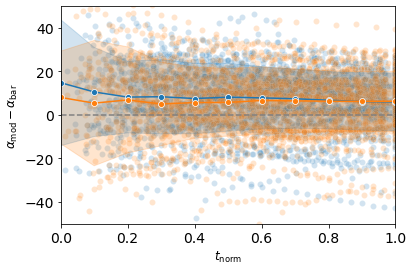

: 

: 

In [ ]:
f,ax=plotting.plot_comparison(DFx2,'alpha','alphab',title='',all=True)
ax.set_ylabel(r'$\alpha_\mathrm{mod} - \alpha_\mathrm{bar}$')
ax.set_xlabel(r'$t_\mathrm{norm}$')
ax.set_xlim(0,1)
ax.set_ylim(-50,50)
ax.axhline(0,color='gray',ls='--')

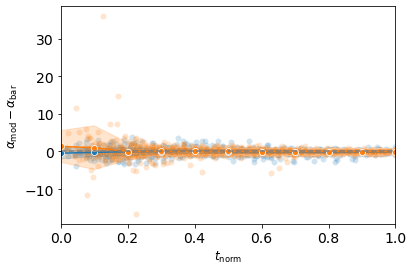

: 

: 

In [ ]:
f,ax=plotting.plot_comparison(DFx2,'rot','rotb',title='',all=True)
ax.set_ylabel(r'$\alpha_\mathrm{mod} - \alpha_\mathrm{bar}$')
ax.set_xlabel(r'$t_\mathrm{norm}$')
ax.set_xlim(0,1)
#ax.set_ylim(-50,50)
ax.axhline(0,color='gray',ls='--')